## Importing Libraries

In [41]:
# !pip install tensorflow
import pandas as pd
import csv 

import sklearn

!pip install xgboost
import xgboost as xgb

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.svm import SVC

from sklearn.ensemble import AdaBoostClassifier

from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import precision_score, accuracy_score, recall_score, \
average_precision_score, precision_recall_curve, confusion_matrix ,  f1_score

from IPython.display import Image
import warnings
warnings.filterwarnings('ignore')

# !pip install imblearn
from imblearn.over_sampling import SMOTE

from os import listdir

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

import matplotlib.pyplot as plt
%matplotlib inline

import scipy.stats as stats
import statsmodels.api as sm

import missingno as msno

import seaborn as sns

import numpy as np

from pylab import rcParams

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

## Loading Dataset

In [42]:
data=pd.read_csv("ulwe_tel.csv")

In [43]:
data

customer_id   ownership  activation_plan_code  mnp_flag  \
0          10000  individual                     4         0   
1          10001  individual                     6         0   
2          10002  individual                     8         1   
3          10003  individual                     7         0   
4          10004  individual                     3         1   
..           ...         ...                   ...       ...   
995        10995  individual                     7         0   
996        10996  individual                     5         0   
997        10997  individual                     7         0   
998        10998  individual                     3         0   
999        10999   corporate                     6         0   

     calls_incoming_cnt  calls_outgoing_cnt  calls_incoming_duration  \
0                  31.0               333.0                31.980873   
1                   8.0                42.0                 9.577651   
2                  13.0                 0.0                15.368591   
3                  20.0                38.0                21.091508   
4                  22.0                29.0                25.592874   
..                  ...                 ...                      ...   
995                22.0               109.0                29.519157   
996                28.0               241.0                53.689309   
997                55.0                31.0                67.539216   
998                22.0               123.0                26.616933   
999                21.0               187.0                26.359661   

     calls_outgoing_duration  total_call_count  total_sum_duration  ...  \
0                 548.719449             364.0          580.700321  ...   
1                  43.988952              50.0           53.566603  ...   
2                   0.000000              13.0           15.368591  ...   
3                  52.044282              58.0           73.135790  ...   
4                  41.290402              51.0           66.883276  ...   
..                       ...               ...                 ...  ...   
995               182.174628             131.0          211.693785  ...   
996               271.012107             269.0          324.701416  ...   
997                42.551143              86.0          110.090359  ...   
998               156.702089             145.0          183.319022  ...   
999               305.788987             208.0          332.148647  ...   

     last_cycle_plan_mrp  last_cycle_plan_validity  \
0                   2999                       700   
1                   2999                       700   
2                    500                       120   
3                    500                       120   
4                    999                       180   
..                   ...                       ...   
995                  300                        90   
996                  500                       120   
997                   99                        15   
998                 2999                       700   
999                   99                        15   

     avg_days_bw_rchg_and_expiry  stddev_days_bw_rchg_and_expiry  \
0                      -1.113238                        2.801930   
1                      -2.032090                        1.600223   
2                      -2.350133                        0.782016   
3                       2.366904                        1.255292   
4                       2.121814                        3.132883   
..                           ...                             ...   
995                     1.783486                        9.573316   
996                     1.018087                        0.523238   
997                     4.905918                        0.746577   
998                    15.256911                        0.296480   
999                    -4.870872                        4.130130   

    

In [44]:
data.describe()

customer_id  activation_plan_code     mnp_flag  calls_incoming_cnt  \
count   1000.000000           1000.000000  1000.000000         1000.000000   
mean   10499.500000              5.547000     0.095000           59.098000   
std      288.819436              2.871243     0.293362           59.655588   
min    10000.000000              1.000000     0.000000            0.000000   
25%    10249.750000              3.000000     0.000000           19.000000   
50%    10499.500000              5.000000     0.000000           40.000000   
75%    10749.250000              8.000000     0.000000           79.000000   
max    10999.000000             10.000000     1.000000          531.000000   

       calls_outgoing_cnt  calls_incoming_duration  calls_outgoing_duration  \
count         1000.000000              1000.000000              1000.000000   
mean            60.789000                89.315690                91.910980   
std             59.257032                93.959748                92.734500   
min              0.000000                 0.000000                 0.000000   
25%             19.000000                26.809249                28.211860   
50%             42.000000                59.200418                65.136142   
75%             85.000000               116.496060               127.278434   
max            427.000000               957.042270               643.949805   

       total_call_count  total_sum_duration  tot_usage_mb  ...  \
count       1000.000000         1000.000000   1000.000000  ...   
mean         119.887000          181.226670  11494.474601  ...   
std           81.974557          128.538379   9479.334765  ...   
min            4.000000            4.046349     65.061020  ...   
25%           60.000000           88.102851   4714.380636  ...   
50%          102.000000          147.924803   8792.473829  ...   
75%          156.000000          248.868696  15856.359078  ...   
max          567.000000          975.014814  55675.724435  ...   

       current_active_plan_validity  last_cycle_plan_mrp  \
count                   1000.000000          1000.000000   
mean                     200.260000           950.667000   
std                      217.375676           977.437282   
min                       15.000000            99.000000   
25%                       28.000000           128.000000   
50%                      120.000000           500.000000   
75%                      365.000000          1500.000000   
max                      700.000000          2999.000000   

       last_cycle_plan_validity  avg_days_bw_rchg_and_expiry  \
count               1000.000000                  1000.000000   
mean                 218.992000                    -0.043774   
std                  229.023977                     2.881490   
min                   15.000000                   -19.453356   
25%                   28.000000                    -1.421545   
50%                  120.000000                    -0.004673   
75%                  365.000000                     1.375305   
max                  700.000000                    15.256911   

       stddev_days_bw_rchg_and_expiry  price_per_day  gb_per_day_quota  \
count                     1000.000000    1000.000000       1000.000000   
mean                         3.017103       4.710166          2.067000   
std                          2.826482       1.037853          1.153621   
min                          0.002493       3.333333          0.500000   
25%                          0.834798       4.109589          1.000000   
50%                          2.173057       4.284286          2.000000   
75%                          4.324794       5.550000          3.000000   
max                         19.137541       6.600000          4.000000   

       pcnt_quota_used  recharge_delay       churn  
count      1000.000000    1.000000e+03  1000.00000  
mean         28.606507    4.920508e-15     0.25600  
std          37.037698    9.698316e+00     0.43664  
m

## Preprocessing data

### Checking Null values

In [45]:
data.isnull().sum()

customer_id                           0
ownership                             0
activation_plan_code                  0
mnp_flag                              0
calls_incoming_cnt                    0
calls_outgoing_cnt                    0
calls_incoming_duration               0
calls_outgoing_duration               0
total_call_count                      0
total_sum_duration                    0
tot_usage_mb                          0
upload_usage_mb                       0
download_usage_mb                     0
days_since_latch                      0
cnt_open_qrc                          0
avg_days_to_close                    26
cnt_call_drops                        0
pcnt_dropped_calls                    0
rsrp_voice_pcnt_poor_duration         0
rsrp_data_pcnt_poor_duration          0
mean_cqi_voice_pcnt_poor_duration     0
sinr_voice_pcnt_poor_duration         0
sinr_data_pcnt_poor_duration          0
age_on_network                        0
cnt_connections                       0


In [46]:
d=data[data['avg_days_to_close'].isnull()]

In [47]:
d[['avg_days_to_close','cnt_open_qrc']]

avg_days_to_close  cnt_open_qrc
15                 NaN             0
42                 NaN             0
60                 NaN             0
68                 NaN             0
232                NaN             0
320                NaN             0
335                NaN             0
339                NaN             0
358                NaN             0
359                NaN             0
396                NaN             0
444                NaN             0
491                NaN             0
557                NaN             0
590                NaN             0
609                NaN             0
614                NaN             0
686                NaN             0
719                NaN             0
766                NaN             0
789                NaN             0
805                NaN             0
880                NaN             0
883                NaN             0
921                NaN             0
964                NaN             0

### The average day to close it is null as there is no query call, hence null values are changed to zero.

In [48]:
data_new = data['avg_days_to_close'].fillna(0)

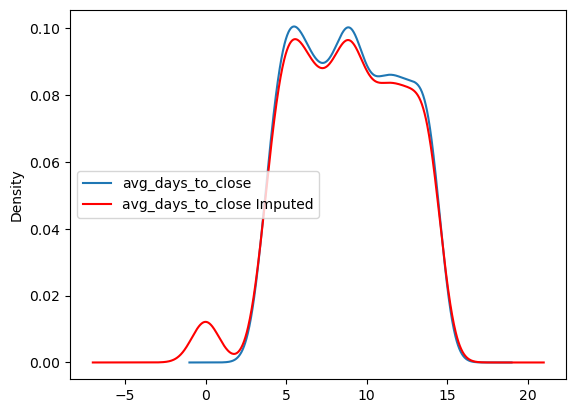

In [49]:
fig = plt.figure()
ax = fig.add_subplot(111)

data['avg_days_to_close'].plot(kind='kde', ax=ax, label = 'avg_days_to_close')
data_new.plot(kind='kde', ax=ax, color='red', label = 'avg_days_to_close Imputed')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.show()

In [50]:
print('Standard Deviation of not-null avg_days_to_close :',data['avg_days_to_close'].std())
print('Standard Deviation after imputation :',data_new.std())

Standard Deviation of not-null avg_days_to_close : 3.129445435861954
Standard Deviation after imputation : 3.40097377564465


### We can impute Null values with 0 since original distribution is nearly identical.

In [51]:
data['avg_days_to_close'].fillna(0,inplace = True )

In [52]:
data.isnull().sum()

customer_id                          0
ownership                            0
activation_plan_code                 0
mnp_flag                             0
calls_incoming_cnt                   0
calls_outgoing_cnt                   0
calls_incoming_duration              0
calls_outgoing_duration              0
total_call_count                     0
total_sum_duration                   0
tot_usage_mb                         0
upload_usage_mb                      0
download_usage_mb                    0
days_since_latch                     0
cnt_open_qrc                         0
avg_days_to_close                    0
cnt_call_drops                       0
pcnt_dropped_calls                   0
rsrp_voice_pcnt_poor_duration        0
rsrp_data_pcnt_poor_duration         0
mean_cqi_voice_pcnt_poor_duration    0
sinr_voice_pcnt_poor_duration        0
sinr_data_pcnt_poor_duration         0
age_on_network                       0
cnt_connections                      0
current_plan_code        

### Checking for datatypes and cardinality 

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        1000 non-null   int64  
 1   ownership                          1000 non-null   object 
 2   activation_plan_code               1000 non-null   int64  
 3   mnp_flag                           1000 non-null   int64  
 4   calls_incoming_cnt                 1000 non-null   float64
 5   calls_outgoing_cnt                 1000 non-null   float64
 6   calls_incoming_duration            1000 non-null   float64
 7   calls_outgoing_duration            1000 non-null   float64
 8   total_call_count                   1000 non-null   float64
 9   total_sum_duration                 1000 non-null   float64
 10  tot_usage_mb                       1000 non-null   float64
 11  upload_usage_mb                    1000 non-null   float6

In [54]:
probs = data['ownership'].value_counts(normalize=True)
data['ownership'] = data['ownership'].map(probs)

In [55]:
probs = data['device_avg_asp'].value_counts(normalize=True)
data['device_avg_asp'] = data['device_avg_asp'].map(probs)

In [56]:
data[['device_avg_asp','ownership']]

device_avg_asp  ownership
0             0.210      0.837
1             0.210      0.837
2             0.200      0.837
3             0.190      0.837
4             0.210      0.837
..              ...        ...
995           0.196      0.837
996           0.196      0.837
997           0.190      0.837
998           0.200      0.837
999           0.210      0.163

[1000 rows x 2 columns]

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 48 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   customer_id                        1000 non-null   int64  
 1   ownership                          1000 non-null   float64
 2   activation_plan_code               1000 non-null   int64  
 3   mnp_flag                           1000 non-null   int64  
 4   calls_incoming_cnt                 1000 non-null   float64
 5   calls_outgoing_cnt                 1000 non-null   float64
 6   calls_incoming_duration            1000 non-null   float64
 7   calls_outgoing_duration            1000 non-null   float64
 8   total_call_count                   1000 non-null   float64
 9   total_sum_duration                 1000 non-null   float64
 10  tot_usage_mb                       1000 non-null   float64
 11  upload_usage_mb                    1000 non-null   float6

In [58]:
raw_data=data

### Finding correlation and removing columns based on correlations 

In [59]:
def correlation_data(df):
    fig = plt.figure(figsize=(12,12))
    corr = df.corr()
    ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
    )
    ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
    );
    dict_columns={}
    
    corr_matrix = df.corr(method='pearson',min_periods=2)
    corr_matrix = corr_matrix.mask(np.tril(np.ones(corr_matrix.shape)).astype(np.bool))

    for col in df.columns:
        col_corrs = corr_matrix[col]
        strong_corrs = col_corrs[abs(col_corrs) > 0.75]
        if len(strong_corrs) != 0: 
            print(f'Column {col}:')
            print(strong_corrs)
            print()
            dict_columns[col]=[strong_corrs]
    return dict_columns

Column calls_incoming_duration:
calls_incoming_cnt    0.968497
Name: calls_incoming_duration, dtype: float64

Column calls_outgoing_duration:
calls_outgoing_cnt    0.969809
Name: calls_outgoing_duration, dtype: float64

Column total_sum_duration:
total_call_count    0.966993
Name: total_sum_duration, dtype: float64

Column download_usage_mb:
tot_usage_mb    0.987272
Name: download_usage_mb, dtype: float64

Column days_since_latch:
total_call_count      0.994560
total_sum_duration    0.961488
Name: days_since_latch, dtype: float64

Column cnt_call_drops:
total_call_count      0.789380
total_sum_duration    0.772228
days_since_latch      0.784534
Name: cnt_call_drops, dtype: float64

Column rsrp_data_pcnt_poor_duration:
rsrp_voice_pcnt_poor_duration    0.992123
Name: rsrp_data_pcnt_poor_duration, dtype: float64

Column sinr_data_pcnt_poor_duration:
sinr_voice_pcnt_poor_duration    0.992442
Name: sinr_data_pcnt_poor_duration, dtype: float64

Column cnt_recharges_made:
age_on_network    0.

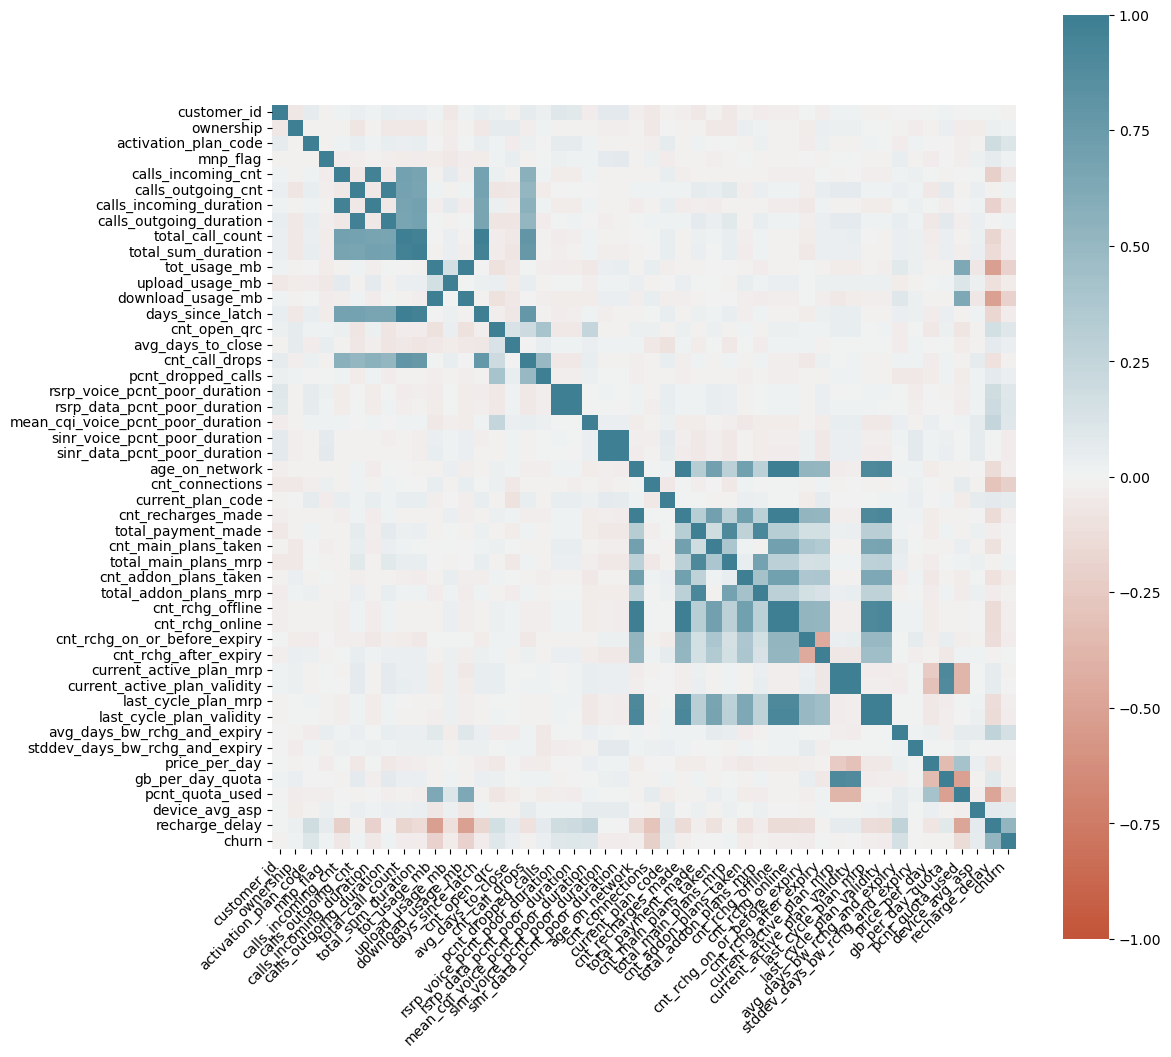

In [60]:
correlation_dict=correlation_data(data)

In [61]:
correlation_dict

{'calls_incoming_duration': [calls_incoming_cnt    0.968497
  Name: calls_incoming_duration, dtype: float64],
 'calls_outgoing_duration': [calls_outgoing_cnt    0.969809
  Name: calls_outgoing_duration, dtype: float64],
 'total_sum_duration': [total_call_count    0.966993
  Name: total_sum_duration, dtype: float64],
 'download_usage_mb': [tot_usage_mb    0.987272
  Name: download_usage_mb, dtype: float64],
 'days_since_latch': [total_call_count      0.994560
  total_sum_duration    0.961488
  Name: days_since_latch, dtype: float64],
 'cnt_call_drops': [total_call_count      0.789380
  total_sum_duration    0.772228
  days_since_latch      0.784534
  Name: cnt_call_drops, dtype: float64],
 'rsrp_data_pcnt_poor_duration': [rsrp_voice_pcnt_poor_duration    0.992123
  Name: rsrp_data_pcnt_poor_duration, dtype: float64],
 'sinr_data_pcnt_poor_duration': [sinr_voice_pcnt_poor_duration    0.992442
  Name: sinr_data_pcnt_poor_duration, dtype: float64],
 'cnt_recharges_made': [age_on_network   

In [62]:
data.drop(columns=['calls_incoming_duration','total_sum_duration','download_usage_mb','days_since_latch','rsrp_voice_pcnt_poor_duration','sinr_voice_pcnt_poor_duration','cnt_recharges_made','total_main_plans_mrp','total_addon_plans_mrp','cnt_rchg_offline','cnt_rchg_online','current_active_plan_mrp','last_cycle_plan_mrp','gb_per_day_quota','calls_incoming_cnt','upload_usage_mb'],inplace=True)

data.corr()

customer_id  ownership  \
customer_id                           1.000000  -0.065720   
ownership                            -0.065720   1.000000   
activation_plan_code                  0.052418  -0.015886   
mnp_flag                             -0.022252  -0.023222   
calls_outgoing_cnt                    0.032568  -0.075944   
calls_outgoing_duration               0.041008  -0.061281   
total_call_count                      0.037623  -0.061342   
tot_usage_mb                          0.011171  -0.019971   
cnt_open_qrc                          0.025472   0.054869   
avg_days_to_close                    -0.019691   0.050221   
cnt_call_drops                        0.048299  -0.025791   
pcnt_dropped_calls                    0.029840   0.016552   
rsrp_data_pcnt_poor_duration          0.082391  -0.013111   
mean_cqi_voice_pcnt_poor_duration    -0.033020  -0.012613   
sinr_data_pcnt_poor_duration          0.072044  -0.028317   
age_on_network                       -0.025426  -0.010790   
cnt_connections                      -0.054758  -0.055949   
current_plan_code                    -0.013335  -0.007612   
total_payment_made                   -0.048365  -0.015571   
cnt_main_plans_taken                 -0.021455  -0.053277   
cnt_addon_plans_taken                -0.015335   0.037349   
cnt_rchg_on_or_before_expiry          0.000142  -0.046271   
cnt_rchg_after_expiry                -0.027149   0.035633   
current_active_plan_validity          0.010897   0.024727   
last_cycle_plan_validity             -0.017633   0.007152   
avg_days_bw_rchg_and_expiry          -0.001610  -0.014424   
stddev_days_bw_rchg_and_expiry       -0.004880  -0.035967   
price_per_day                         0.005711  -0.020379   
pcnt_quota_used                      -0.000417  -0.035300   
device_avg_asp                        0.002006  -0.040637   
recharge_delay                        0.001770   0.027508   
churn                                -0.016359   0.010720   

                                   activation_plan_code  mnp_flag  \
customer_id                                    0.052418 -0.022252   
ownership                                     -0.015886 -0.023222   
activation_plan_code                           1.000000 -0.013031   
mnp_flag                                      -0.013031  1.000000   
calls_outgoing_cnt                             0.042704 -0.024355   
calls_outgoing_duration                        0.042834 -0.029865   
total_call_count                               0.038905 -0.042302   
tot_usage_mb                                  -0.004974 -0.041390   
cnt_open_qrc                                   0.011120  0.013884   
avg_days_to_close                             -0.035208  0.041496   
cnt_call_drops                                 0.031177 -0.022020   
pcnt_dropped_calls                            -0.004628  0.002493   
rsrp_data_pcnt_poor_duration                   0.051820  0.022571   
mean_cqi_voice_pcnt_poor_duration              0.017128  0.011963   
sinr_data_pcnt_poor_duration                  -0.023007  0.075910   
age_on_network                                -0.010357 -0.017475   
cnt_connections                               -0.024122  0.025066   
current_plan_code                              0.051528 -0.039054   
total_payment_made                             0.017207 -0.017594   
cnt_main_plans_taken                          -0.005301 -0.026239   
cnt_addon_plans_taken                         -0.009651  0.000578   
cnt_rchg_on_or_before_expiry                  -0.034484 -0.004700   
cnt_rchg_after_expiry                          0.023885 -0.013952   
current_active_plan_validity                  -0.015075  0.004400   
last_cycle_plan_validity                       0.005211 -0.018120   
avg_days_bw_rchg_and_expiry                   -0.033716  0.042755   
stddev_days_bw_rchg_and_expiry                 0.023346 -0.023000   
price_per_day                                 -0.005425 -0.036184   
pcnt_quota_used     

### Checking Distribution 

In [63]:
data.hist(bins=50, figsize=(200, 200))

array([[<AxesSubplot:title={'center':'customer_id'}>,
        <AxesSubplot:title={'center':'ownership'}>,
        <AxesSubplot:title={'center':'activation_plan_code'}>,
        <AxesSubplot:title={'center':'mnp_flag'}>,
        <AxesSubplot:title={'center':'calls_outgoing_cnt'}>,
        <AxesSubplot:title={'center':'calls_outgoing_duration'}>],
       [<AxesSubplot:title={'center':'total_call_count'}>,
        <AxesSubplot:title={'center':'tot_usage_mb'}>,
        <AxesSubplot:title={'center':'cnt_open_qrc'}>,
        <AxesSubplot:title={'center':'avg_days_to_close'}>,
        <AxesSubplot:title={'center':'cnt_call_drops'}>,
        <AxesSubplot:title={'center':'pcnt_dropped_calls'}>],
       [<AxesSubplot:title={'center':'rsrp_data_pcnt_poor_duration'}>,
        <AxesSubplot:title={'center':'mean_cqi_voice_pcnt_poor_duration'}>,
        <AxesSubplot:title={'center':'sinr_data_pcnt_poor_duration'}>,
        <AxesSubplot:title={'center':'age_on_network'}>,
        <AxesSubplot:title={'

In [64]:
def diagnostic_plots(df, variable):

    fig = plt.figure(figsize=(15,6))
    ax = fig.add_subplot(121)
    df[variable].hist(bins=30)
    
    ax = fig.add_subplot(122)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [65]:
def box_cox(df,variable):
    df[variable]=df[variable]+0.001 # adding a small value because boxcox needs positive values and min Fare is 0
    df[variable], param = stats.boxcox(df[variable]) 

    print('Optimal λ: ', param)

    diagnostic_plots(df, variable)

In [66]:
def sqrroot(df,variables):
    df[variables]=df[variables]**(1/2)
    diagnostic_plots(df, variables)

In [67]:
columnss_box=['total_call_count','tot_usage_mb','pcnt_dropped_calls','age_on_network','cnt_main_plans_taken','cnt_addon_plans_taken','cnt_rchg_on_or_before_expiry','cnt_rchg_after_expiry','stddev_days_bw_rchg_and_expiry','pcnt_quota_used']

Optimal λ:  0.28595945621842606


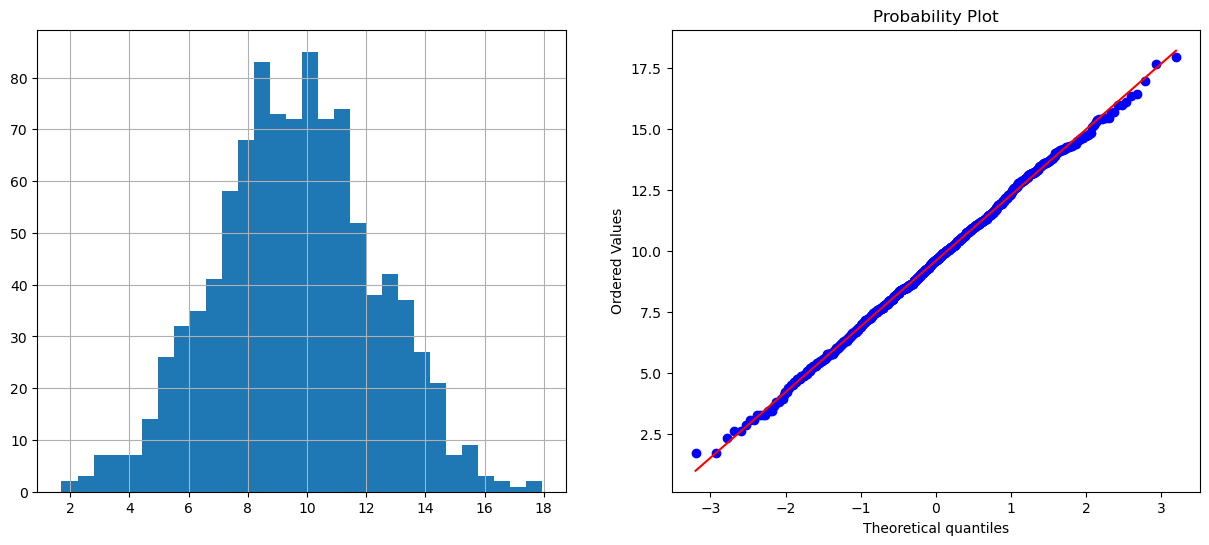

Optimal λ:  0.24506563925677236


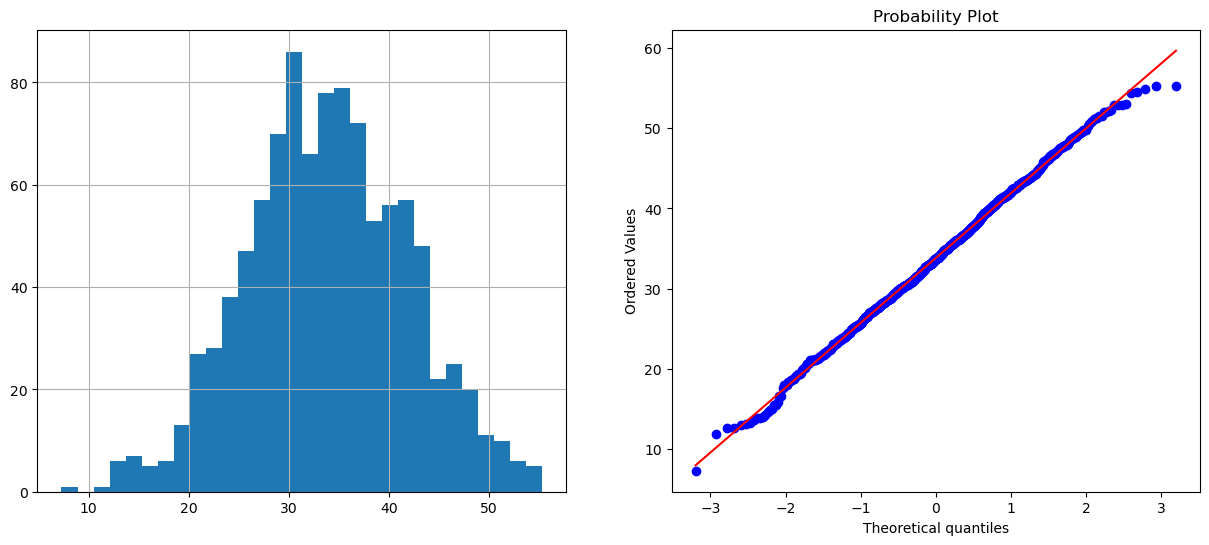

Optimal λ:  0.5017720296357714


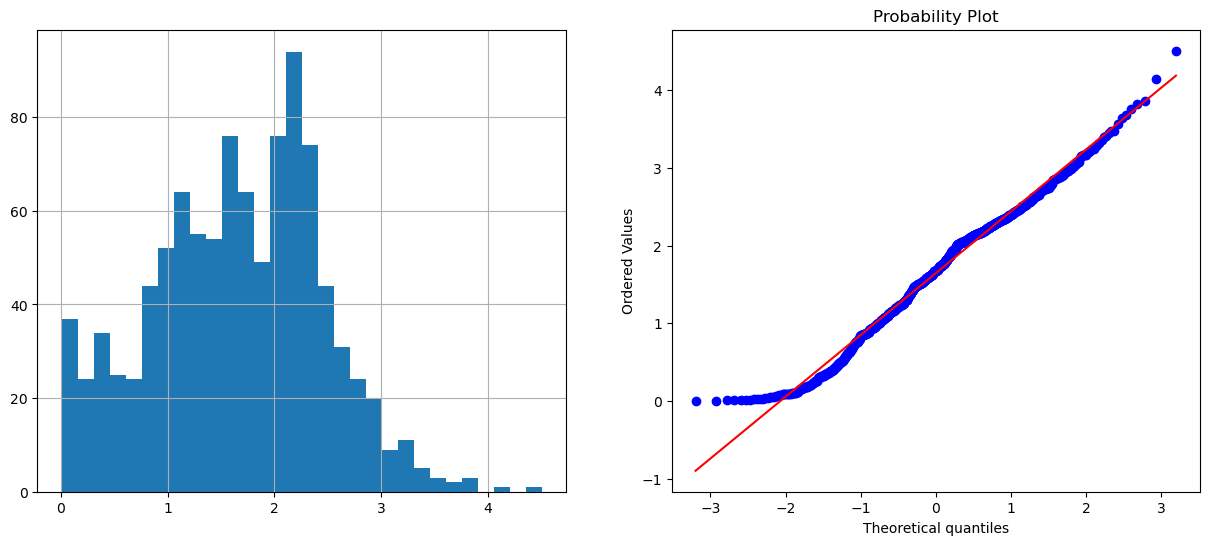

Optimal λ:  0.19497694582009936


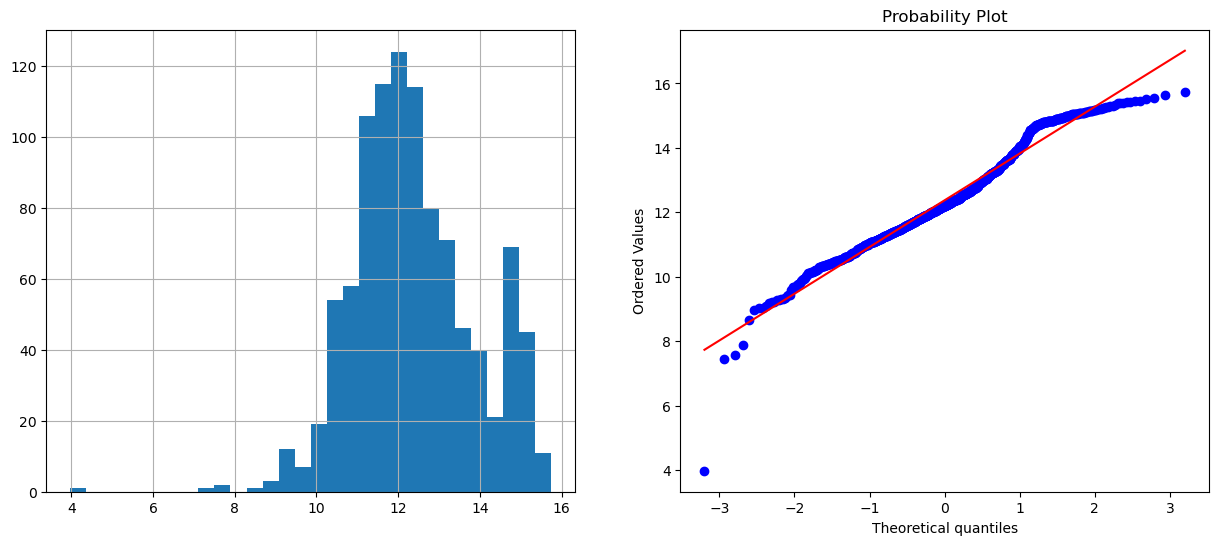

Optimal λ:  0.09495907537653477


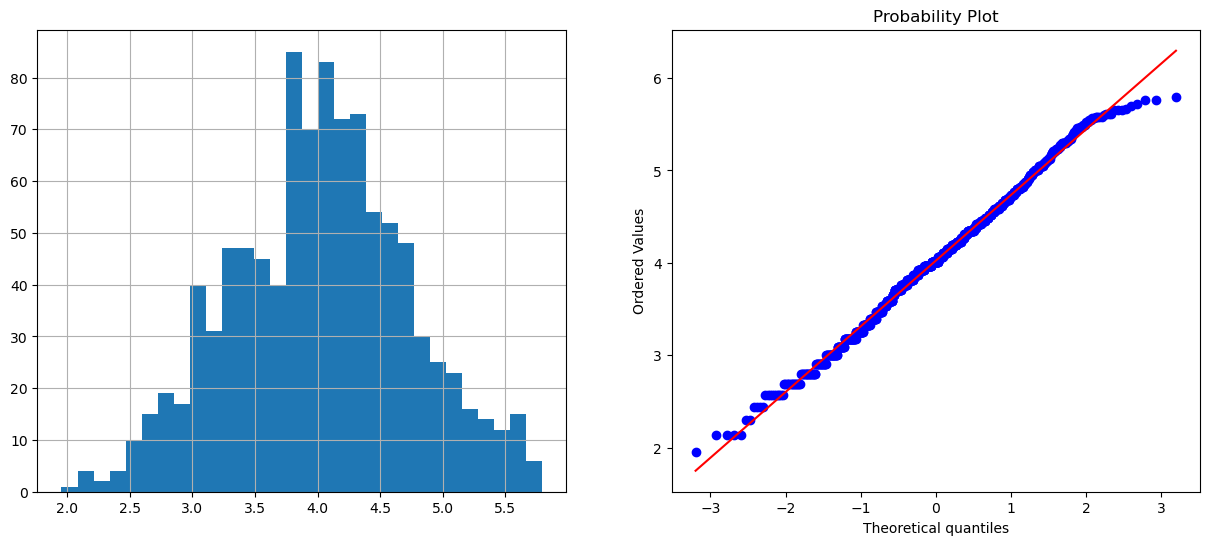

Optimal λ:  0.08495360812290843


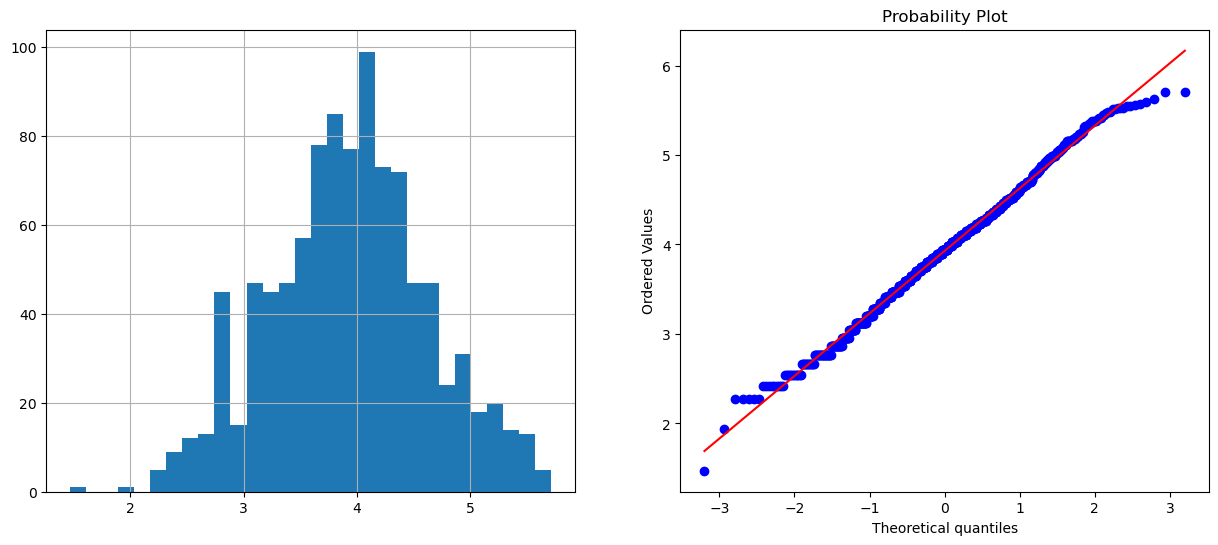

Optimal λ:  0.4622025851240023


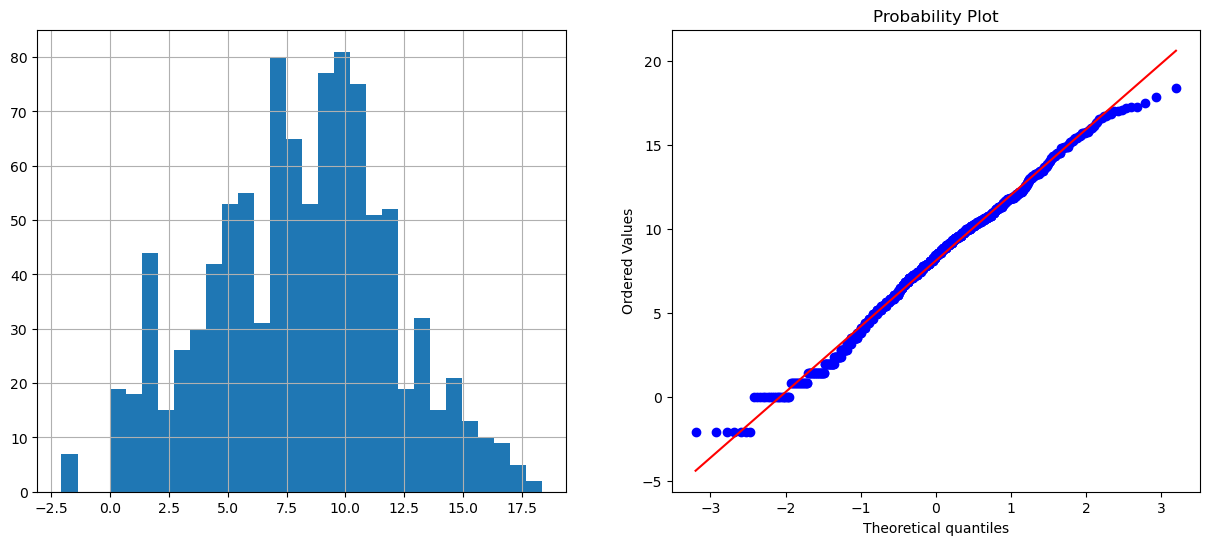

Optimal λ:  0.4457596986922278


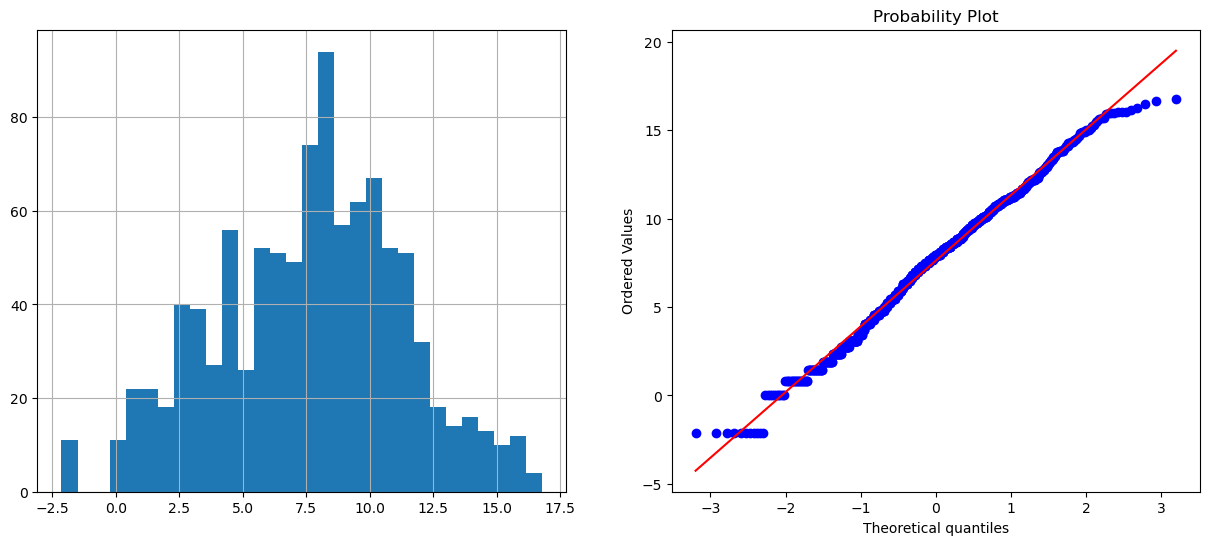

Optimal λ:  0.2862308705642722


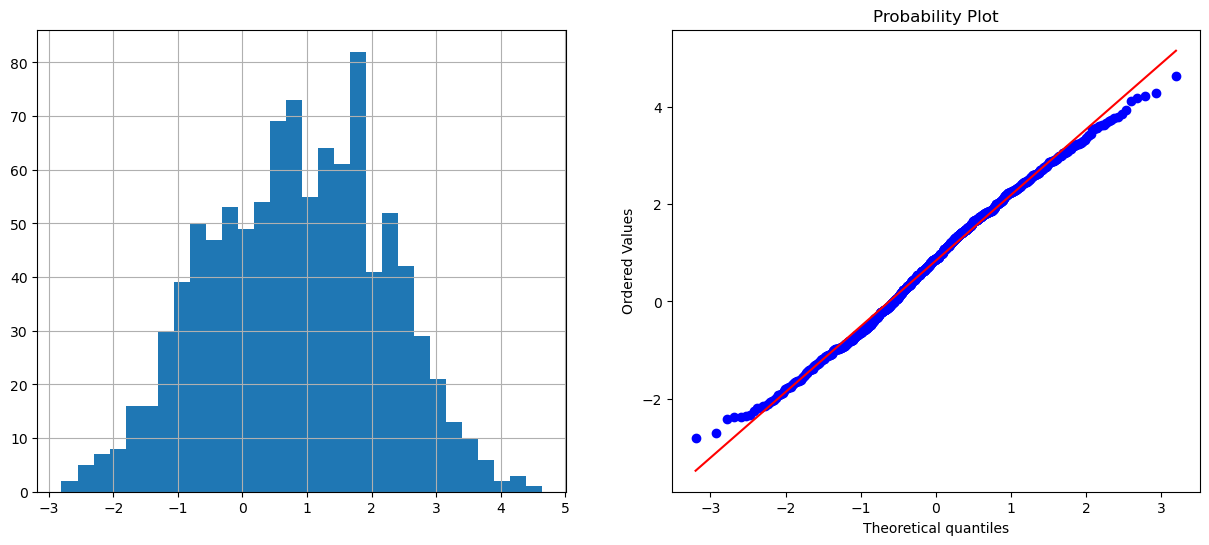

Optimal λ:  0.0638777253804693


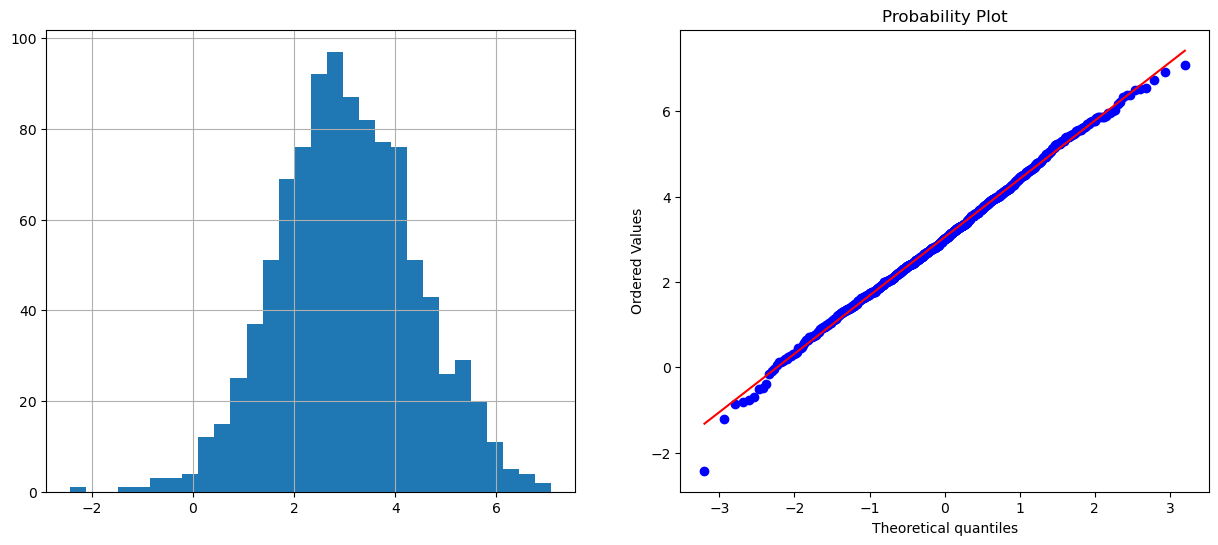

In [68]:
for i in columnss_box:
    box_cox(data,i)
    
    

In [69]:
columns_sqroot=['rsrp_data_pcnt_poor_duration','mean_cqi_voice_pcnt_poor_duration','sinr_data_pcnt_poor_duration']

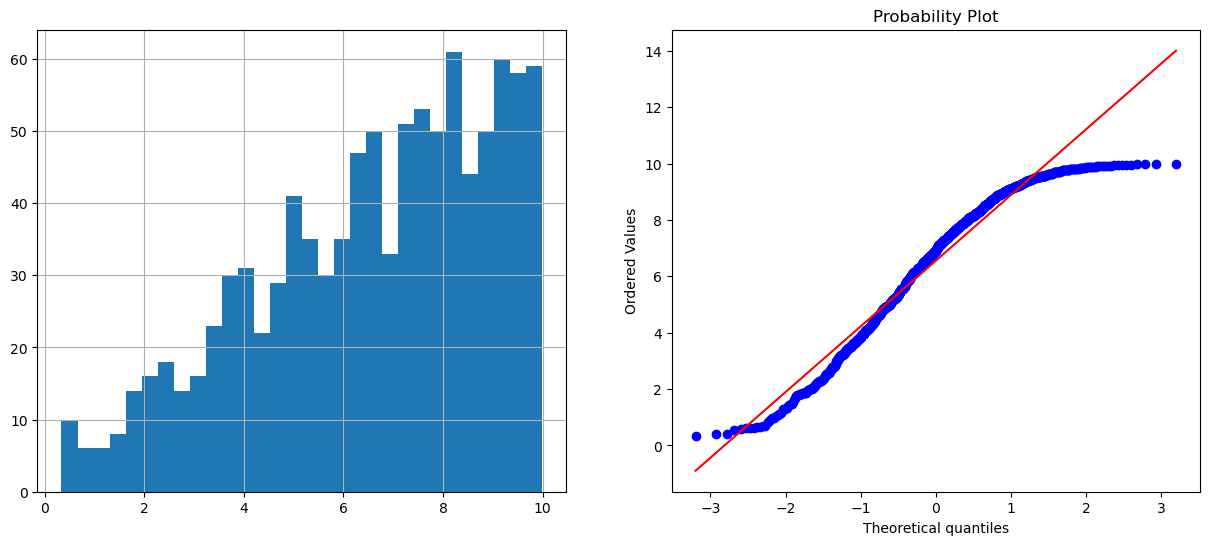

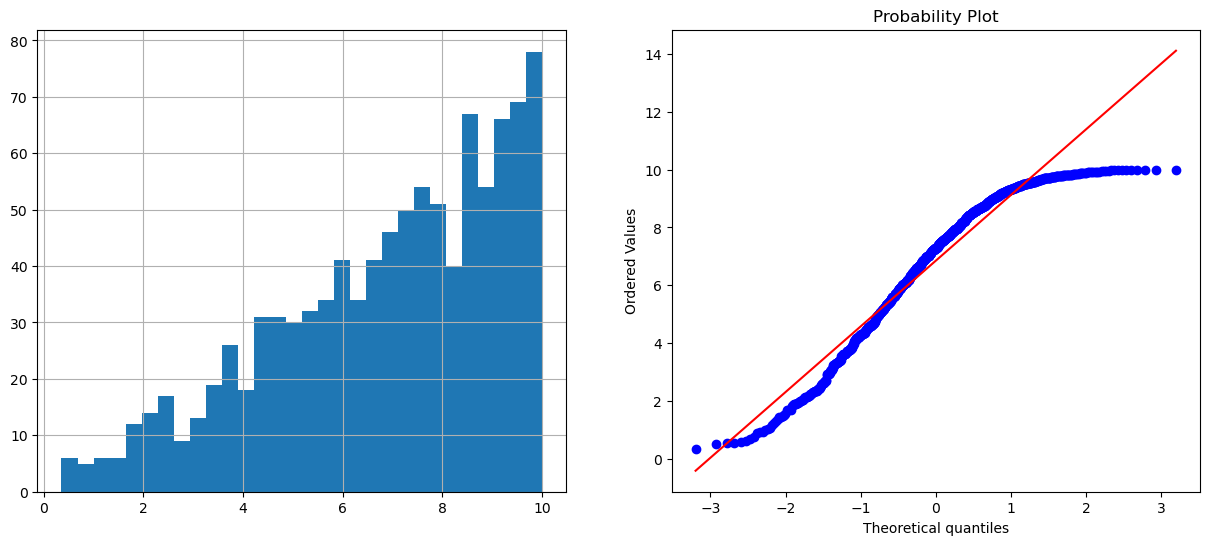

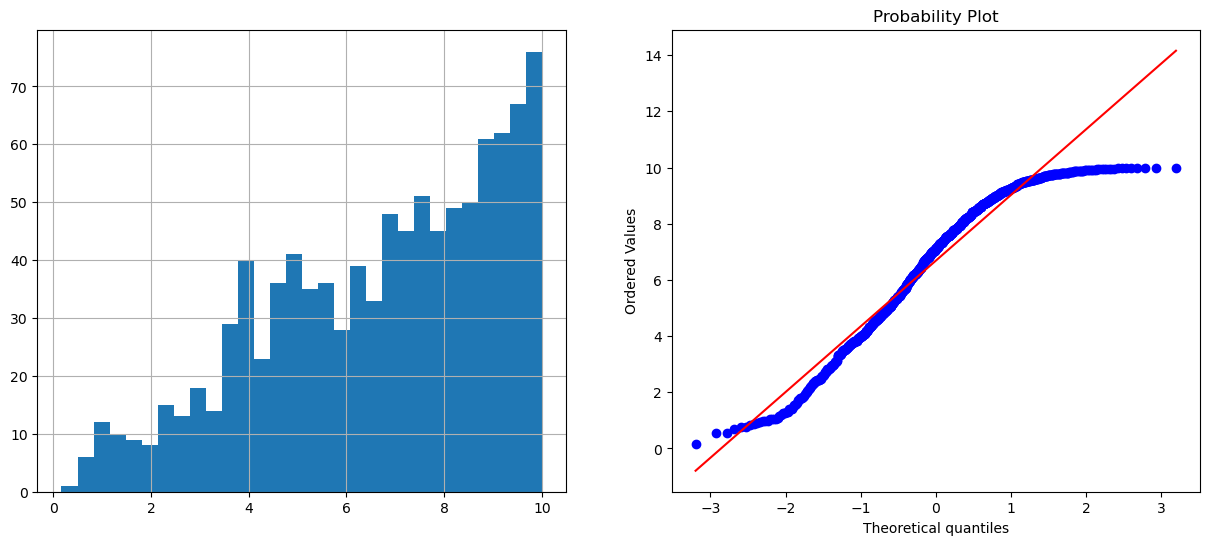

In [70]:
for i in columns_sqroot:
    sqrroot(data,i)

In [71]:
data.hist(bins=50, figsize=(200, 200))

array([[<AxesSubplot:title={'center':'customer_id'}>,
        <AxesSubplot:title={'center':'ownership'}>,
        <AxesSubplot:title={'center':'activation_plan_code'}>,
        <AxesSubplot:title={'center':'mnp_flag'}>,
        <AxesSubplot:title={'center':'calls_outgoing_cnt'}>,
        <AxesSubplot:title={'center':'calls_outgoing_duration'}>],
       [<AxesSubplot:title={'center':'total_call_count'}>,
        <AxesSubplot:title={'center':'tot_usage_mb'}>,
        <AxesSubplot:title={'center':'cnt_open_qrc'}>,
        <AxesSubplot:title={'center':'avg_days_to_close'}>,
        <AxesSubplot:title={'center':'cnt_call_drops'}>,
        <AxesSubplot:title={'center':'pcnt_dropped_calls'}>],
       [<AxesSubplot:title={'center':'rsrp_data_pcnt_poor_duration'}>,
        <AxesSubplot:title={'center':'mean_cqi_voice_pcnt_poor_duration'}>,
        <AxesSubplot:title={'center':'sinr_data_pcnt_poor_duration'}>,
        <AxesSubplot:title={'center':'age_on_network'}>,
        <AxesSubplot:title={'

### Splitting In test and train data

In [72]:
data.columns

Index(['customer_id', 'ownership', 'activation_plan_code', 'mnp_flag',
       'calls_outgoing_cnt', 'calls_outgoing_duration', 'total_call_count',
       'tot_usage_mb', 'cnt_open_qrc', 'avg_days_to_close', 'cnt_call_drops',
       'pcnt_dropped_calls', 'rsrp_data_pcnt_poor_duration',
       'mean_cqi_voice_pcnt_poor_duration', 'sinr_data_pcnt_poor_duration',
       'age_on_network', 'cnt_connections', 'current_plan_code',
       'total_payment_made', 'cnt_main_plans_taken', 'cnt_addon_plans_taken',
       'cnt_rchg_on_or_before_expiry', 'cnt_rchg_after_expiry',
       'current_active_plan_validity', 'last_cycle_plan_validity',
       'avg_days_bw_rchg_and_expiry', 'stddev_days_bw_rchg_and_expiry',
       'price_per_day', 'pcnt_quota_used', 'device_avg_asp', 'recharge_delay',
       'churn'],
      dtype='object')

In [73]:
features=['ownership', 'activation_plan_code', 'mnp_flag',
       'calls_outgoing_cnt', 'tot_usage_mb', 'cnt_open_qrc',
       'avg_days_to_close', 'cnt_call_drops', 'pcnt_dropped_calls',
       'rsrp_data_pcnt_poor_duration', 'mean_cqi_voice_pcnt_poor_duration',
       'sinr_data_pcnt_poor_duration', 'cnt_connections', 'current_plan_code',
       'pcnt_quota_used', 'recharge_delay']

features_df=data[features]

In [74]:
features_df.shape

(1000, 16)

In [75]:
traget_df=data['churn']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(features_df, traget_df, test_size=0.3, random_state=1729)

### Determining whether the data is balanced

0    744
1    256
Name: churn, dtype: int64


<AxesSubplot:xlabel='churn', ylabel='count'>

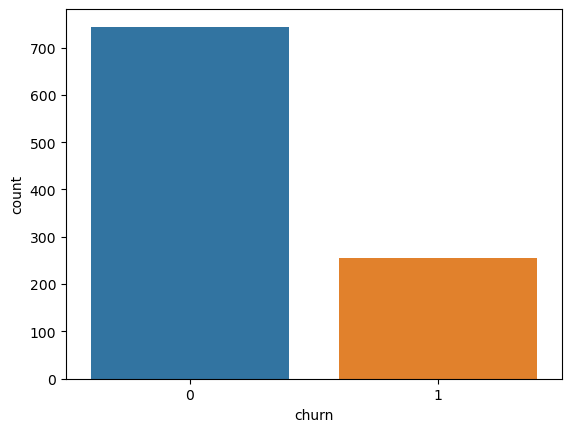

In [77]:
print(data.churn.value_counts())
sns.countplot("churn",data=data)

### Over sampling

In [78]:
sm = SMOTE(random_state=2)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
X_train_oversampled = pd.DataFrame(X_train_oversampled, columns=X_train.columns)
oversampled_train = pd.concat([pd.DataFrame(y_train_oversampled), pd.DataFrame(X_train_oversampled)], axis=1)

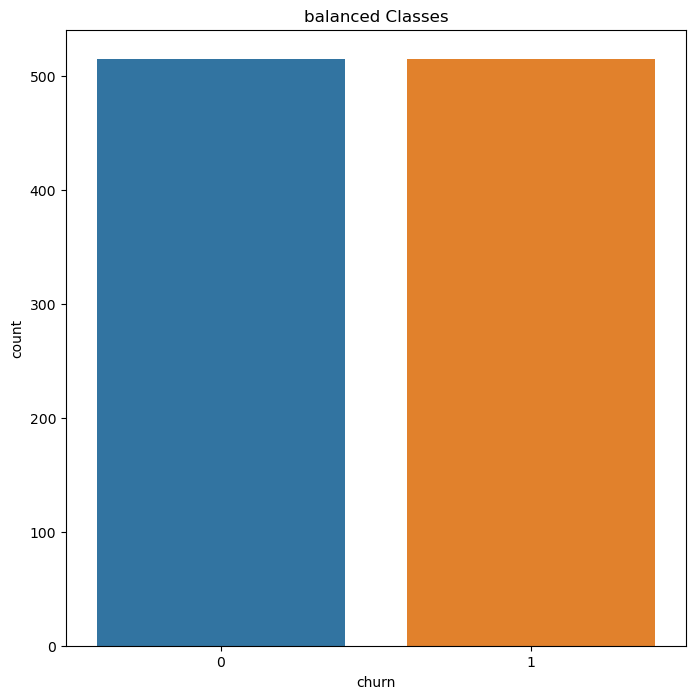

In [79]:
plt.figure(figsize=(8, 8))
sns.countplot(x='churn', data=oversampled_train)
plt.title('balanced Classes')
plt.show()

### Undersampling

In [80]:
sampler = RandomUnderSampler()
X_train_undersampled, y_train_undersampled = sampler.fit_resample(X_train, y_train)
X_train_undersampled = pd.DataFrame(X_train_undersampled, columns=X_train.columns)
undersampled_train = pd.concat([pd.DataFrame(y_train_undersampled), pd.DataFrame(X_train_undersampled)], axis=1)


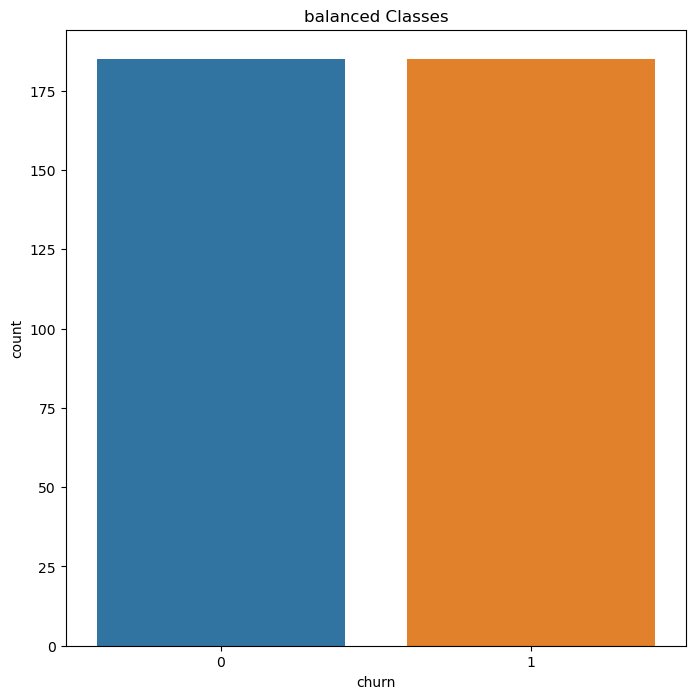

In [81]:
plt.figure(figsize=(8, 8))
sns.countplot(x='churn', data=undersampled_train)
plt.title('balanced Classes')
plt.show()

### Standardization/normalization

In [83]:
scaler=StandardScaler()

In [84]:
X_train_o=scaler.fit_transform(X_train_oversampled)
X_train_u=scaler.fit_transform(X_train_undersampled)
X_test=scaler.transform(X_test)

## Fisher Discriminant

In [85]:
lda = LDA()
lda_o = lda.fit(X_train_o, y_train_oversampled)
X_train_lda_0 = lda.transform(X_train_o)
X_test_lda_0 = lda.transform(X_test)
y_train_pred = lda.predict(X_train_o)
y_test_pred = lda.predict(X_test)

In [86]:
lda_u = lda.fit(X_train_u, y_train_undersampled)
X_train_lda_u = lda.transform(X_train_u)
X_test_lda_u = lda.transform(X_test)
y_train_pred = lda.predict(X_train_u)
y_test_pred = lda.predict(X_test)

In [87]:
def evaluate_model(y_test,preds):
    accuracy = accuracy_score(y_test, preds)
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap=plt.cm.Blues)
    recall_0 = sklearn.metrics.recall_score(y_test, preds, pos_label=0)
    recall_1 = sklearn.metrics.recall_score(y_test, preds, pos_label=1)
    
    precision = precision_score(y_test, preds)
    f1=f1_score(y_test,preds)
    
    return {'recall_0':recall_0 , 'recall_1':recall_1 ,'precision':precision,'accuracy':accuracy , 'F1-score':f1,}


### Models

In [88]:
gnb = GaussianNB()
model = RandomForestClassifier(n_estimators=100, random_state=42)
clf= LogisticRegression( C= 0.01, solver = 'lbfgs', dual=False)
xgb_cl = xgb.XGBClassifier()
model_ada = AdaBoostClassifier(n_estimators=100, random_state=42)



In [89]:
def logistic_regression(X_train , Xtest , Y_train ,Y_test):
    log_reg_model=clf.fit(X_train, Y_train)
    predicted_lr = clf.predict(Xtest)
    ans_lr = evaluate_model(Y_test,predicted_lr)
#     print(ans_lr)
    return ans_lr
    

In [90]:
def gaussian_model(X_train , Xtest , Y_train ,Y_test):
    gnb_classifier = gnb.fit(X_train, Y_train)
    predicted_gnb = gnb_classifier.predict(Xtest)
    ans_gnb = evaluate_model(Y_test,predicted_gnb)
#     print(ans_gnb)
    return ans_gnb

In [91]:
def randomforest(X_train , Xtest , Y_train ,Y_test):
    model.fit(X_train, Y_train)
    predicted_rf = model.predict(Xtest)
    ans_rf = evaluate_model(Y_test,predicted_rf)
#     print(ans_rf)
    return ans_rf
    

In [92]:
def adabooost(X_train , Xtest , Y_train ,Y_test):
    model_ada.fit(X_train, Y_train)
    predicted_ab = model_ada.predict(Xtest)
    ans_ab = evaluate_model(Y_test,predicted_ab)
#     print(ans_ab)
    return ans_ab
    

In [93]:
def Xgboost(X_train , Xtest , Y_train ,Y_test):
    xgb_cl.fit(X_train, Y_train)
    predicted_xg = xgb_cl.predict(Xtest)
    ans_xg = evaluate_model(Y_test,predicted_xg)
#     print(ans_xg)
    return ans_xg
    

### Without applying LDA on oversampling data

Method  Accuracy  F1_score  Recall_0  \
0  Gaussian without LDA on Oversampling  0.673333  0.514851  0.655022   

   Recall_1  Precision  
0  0.732394   0.396947

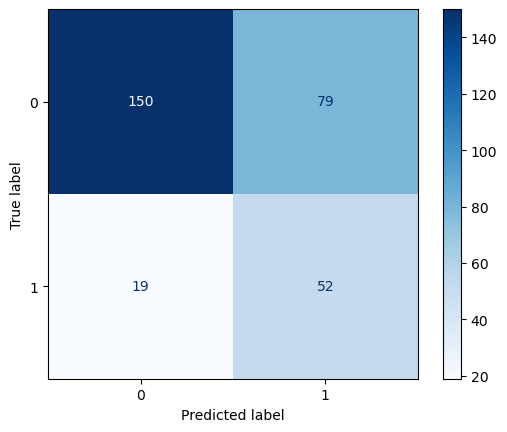

In [94]:
answer=gaussian_model(X_train_o,X_test,y_train_oversampled,y_test)
results = pd.DataFrame({'Method':['Gaussian without LDA on Oversampling'],'Accuracy': [answer.get('accuracy')],'F1_score':[answer.get('F1-score')],'Recall_0':[answer.get('recall_0')],'Recall_1':[answer.get('recall_1')],'Precision':[answer.get('precision')]})
results = results[['Method', 'Accuracy','F1_score','Recall_0','Recall_1','Precision']]
results

Method  Accuracy  F1_score  \
0             Gaussian without LDA on Oversampling  0.673333  0.514851   
0  Logistic regression without LDA on Oversampling  0.750000  0.594595   

   Recall_0  Recall_1  Precision  
0  0.655022  0.732394   0.396947  
0  0.742358  0.774648   0.482456

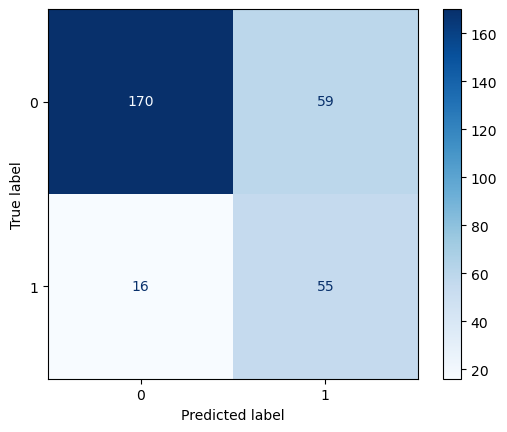

In [95]:
answer=logistic_regression(X_train_o,X_test,y_train_oversampled,y_test)
temp=pd.DataFrame({'Method':['Logistic regression without LDA on Oversampling'],'Accuracy': [answer.get('accuracy')],'F1_score':[answer.get('F1-score')],'Recall_0':[answer.get('recall_0')],'Recall_1':[answer.get('recall_1')],'Precision':[answer.get('precision')]})
results = pd.concat([results, temp])
results = results[['Method', 'Accuracy','F1_score','Recall_0','Recall_1','Precision']]
results

Method  Accuracy  F1_score  \
0             Gaussian without LDA on Oversampling  0.673333  0.514851   
0  Logistic regression without LDA on Oversampling  0.750000  0.594595   
0        Random Forest without LDA on Oversampling  0.883333  0.751773   

   Recall_0  Recall_1  Precision  
0  0.655022  0.732394   0.396947  
0  0.742358  0.774648   0.482456  
0  0.925764  0.746479   0.757143

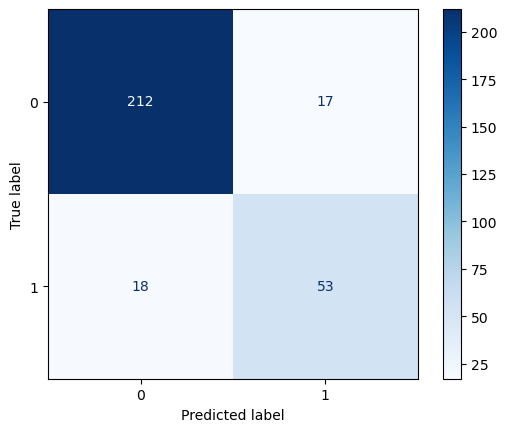

In [96]:
answer=randomforest(X_train_o,X_test,y_train_oversampled,y_test)
temp=pd.DataFrame({'Method':['Random Forest without LDA on Oversampling'],'Accuracy': [answer.get('accuracy')],'F1_score':[answer.get('F1-score')],'Recall_0':[answer.get('recall_0')],'Recall_1':[answer.get('recall_1')],'Precision':[answer.get('precision')]})
results = pd.concat([results, temp])
results = results[['Method', 'Accuracy','F1_score','Recall_0','Recall_1','Precision']]
results

Method  Accuracy  F1_score  \
0             Gaussian without LDA on Oversampling  0.673333  0.514851   
0  Logistic regression without LDA on Oversampling  0.750000  0.594595   
0        Random Forest without LDA on Oversampling  0.883333  0.751773   
0             AdaBoost without LDA on Oversampling  0.740000  0.606061   

   Recall_0  Recall_1  Precision  
0  0.655022  0.732394   0.396947  
0  0.742358  0.774648   0.482456  
0  0.925764  0.746479   0.757143  
0  0.707424  0.845070   0.472441

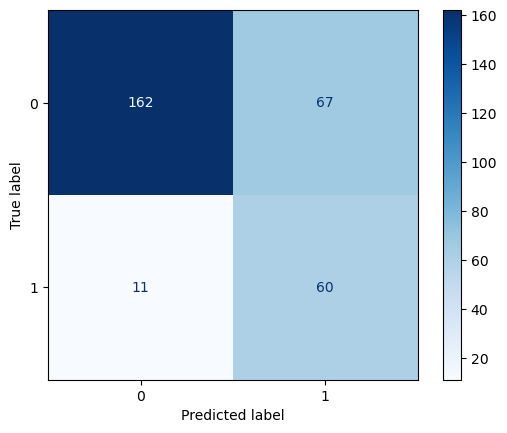

In [97]:
answer=adabooost(X_train_o,X_test,y_train_oversampled,y_test)
temp=pd.DataFrame({'Method':['AdaBoost without LDA on Oversampling'],'Accuracy': [answer.get('accuracy')],'F1_score':[answer.get('F1-score')],'Recall_0':[answer.get('recall_0')],'Recall_1':[answer.get('recall_1')],'Precision':[answer.get('precision')]})
results = pd.concat([results, temp])
results = results[['Method', 'Accuracy','F1_score','Recall_0','Recall_1','Precision']]
results

Method  Accuracy  F1_score  \
0             Gaussian without LDA on Oversampling  0.673333  0.514851   
0  Logistic regression without LDA on Oversampling  0.750000  0.594595   
0        Random Forest without LDA on Oversampling  0.883333  0.751773   
0             AdaBoost without LDA on Oversampling  0.740000  0.606061   
0              XGBoost without LDA on Oversampling  0.773333  0.638298   

   Recall_0  Recall_1  Precision  
0  0.655022  0.732394   0.396947  
0  0.742358  0.774648   0.482456  
0  0.925764  0.746479   0.757143  
0  0.707424  0.845070   0.472441  
0  0.751092  0.845070   0.512821

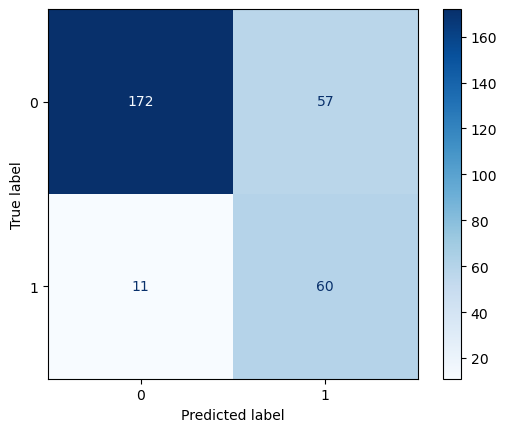

In [98]:
answer=Xgboost(X_train_o,X_test,y_train_oversampled,y_test)
temp=pd.DataFrame({'Method':['XGBoost without LDA on Oversampling'],'Accuracy': [answer.get('accuracy')],'F1_score':[answer.get('F1-score')],'Recall_0':[answer.get('recall_0')],'Recall_1':[answer.get('recall_1')],'Precision':[answer.get('precision')]})
results = pd.concat([results, temp])
results = results[['Method', 'Accuracy','F1_score','Recall_0','Recall_1','Precision']]
results

### Without applying LDA on undersampling data

Method  Accuracy  F1_score  \
0             Gaussian without LDA on Oversampling  0.673333  0.514851   
0  Logistic regression without LDA on Oversampling  0.750000  0.594595   
0        Random Forest without LDA on Oversampling  0.883333  0.751773   
0             AdaBoost without LDA on Oversampling  0.740000  0.606061   
0              XGBoost without LDA on Oversampling  0.773333  0.638298   
0             XGBoost without LDA on undersampling  0.860000  0.716216   

   Recall_0  Recall_1  Precision  
0  0.655022  0.732394   0.396947  
0  0.742358  0.774648   0.482456  
0  0.925764  0.746479   0.757143  
0  0.707424  0.845070   0.472441  
0  0.751092  0.845070   0.512821  
0  0.895197  0.746479   0.688312

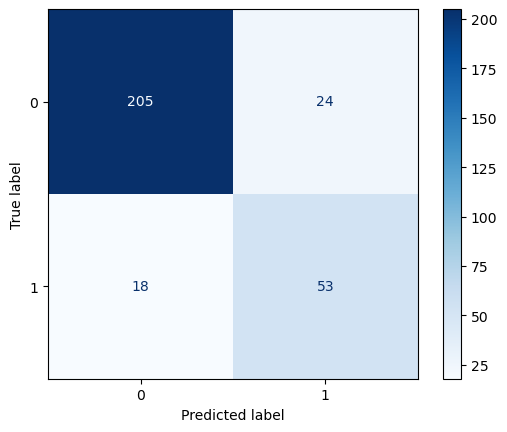

In [99]:
answer=Xgboost(X_train_u,X_test,y_train_undersampled,y_test)
temp=pd.DataFrame({'Method':['XGBoost without LDA on undersampling'],'Accuracy': [answer.get('accuracy')],'F1_score':[answer.get('F1-score')],'Recall_0':[answer.get('recall_0')],'Recall_1':[answer.get('recall_1')],'Precision':[answer.get('precision')]})
results = pd.concat([results, temp])
results = results[['Method', 'Accuracy','F1_score','Recall_0','Recall_1','Precision']]
results

Method  Accuracy  F1_score  \
0             Gaussian without LDA on Oversampling  0.673333  0.514851   
0  Logistic regression without LDA on Oversampling  0.750000  0.594595   
0        Random Forest without LDA on Oversampling  0.883333  0.751773   
0             AdaBoost without LDA on Oversampling  0.740000  0.606061   
0              XGBoost without LDA on Oversampling  0.773333  0.638298   
0             XGBoost without LDA on undersampling  0.860000  0.716216   
0            AdaBoost without LDA on Undersampling  0.846667  0.705128   

   Recall_0  Recall_1  Precision  
0  0.655022  0.732394   0.396947  
0  0.742358  0.774648   0.482456  
0  0.925764  0.746479   0.757143  
0  0.707424  0.845070   0.472441  
0  0.751092  0.845070   0.512821  
0  0.895197  0.746479   0.688312  
0  0.868996  0.774648   0.647059

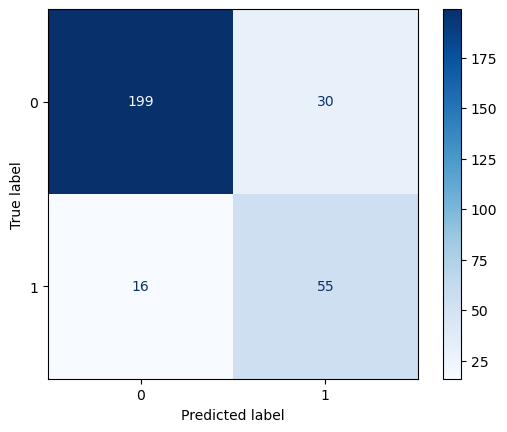

In [100]:
answer=adabooost(X_train_u,X_test,y_train_undersampled,y_test)
temp=pd.DataFrame({'Method':['AdaBoost without LDA on Undersampling'],'Accuracy': [answer.get('accuracy')],'F1_score':[answer.get('F1-score')],'Recall_0':[answer.get('recall_0')],'Recall_1':[answer.get('recall_1')],'Precision':[answer.get('precision')]})
results = pd.concat([results, temp])
results = results[['Method', 'Accuracy','F1_score','Recall_0','Recall_1','Precision']]
results

Method  Accuracy  F1_score  \
0             Gaussian without LDA on Oversampling  0.673333  0.514851   
0  Logistic regression without LDA on Oversampling  0.750000  0.594595   
0        Random Forest without LDA on Oversampling  0.883333  0.751773   
0             AdaBoost without LDA on Oversampling  0.740000  0.606061   
0              XGBoost without LDA on Oversampling  0.773333  0.638298   
0             XGBoost without LDA on undersampling  0.860000  0.716216   
0            AdaBoost without LDA on Undersampling  0.846667  0.705128   
0       Random Forest without LDA on Undersampling  0.913333  0.800000   

   Recall_0  Recall_1  Precision  
0  0.655022  0.732394   0.396947  
0  0.742358  0.774648   0.482456  
0  0.925764  0.746479   0.757143  
0  0.707424  0.845070   0.472441  
0  0.751092  0.845070   0.512821  
0  0.895197  0.746479   0.688312  
0  0.868996  0.774648   0.647059  
0  0.969432  0.732394   0.881356

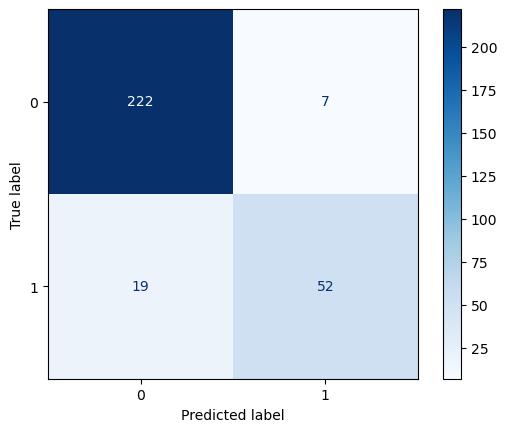

In [101]:
answer=randomforest(X_train_u,X_test,y_train_undersampled,y_test)
temp=pd.DataFrame({'Method':['Random Forest without LDA on Undersampling'],'Accuracy': [answer.get('accuracy')],'F1_score':[answer.get('F1-score')],'Recall_0':[answer.get('recall_0')],'Recall_1':[answer.get('recall_1')],'Precision':[answer.get('precision')]})
results = pd.concat([results, temp])
results = results[['Method', 'Accuracy','F1_score','Recall_0','Recall_1','Precision']]
results

Method  Accuracy  F1_score  \
0              Gaussian without LDA on Oversampling  0.673333  0.514851   
0   Logistic regression without LDA on Oversampling  0.750000  0.594595   
0         Random Forest without LDA on Oversampling  0.883333  0.751773   
0              AdaBoost without LDA on Oversampling  0.740000  0.606061   
0               XGBoost without LDA on Oversampling  0.773333  0.638298   
0              XGBoost without LDA on undersampling  0.860000  0.716216   
0             AdaBoost without LDA on Undersampling  0.846667  0.705128   
0        Random Forest without LDA on Undersampling  0.913333  0.800000   
0  Logistic regression without LDA on Undersampling  0.760000  0.621053   

   Recall_0  Recall_1  Precision  
0  0.655022  0.732394   0.396947  
0  0.742358  0.774648   0.482456  
0  0.925764  0.746479   0.757143  
0  0.707424  0.845070   0.472441  
0  0.751092  0.845070   0.512821  
0  0.895197  0.746479   0.688312  
0  0.868996  0.774648   0.647059  
0  0.969432  0.732394   0.881356  
0  0.737991  0.830986   0.495798

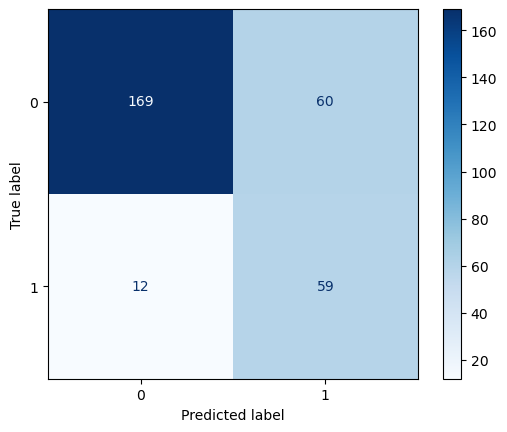

In [102]:
answer=logistic_regression(X_train_u,X_test,y_train_undersampled,y_test)
temp=pd.DataFrame({'Method':['Logistic regression without LDA on Undersampling'],'Accuracy': [answer.get('accuracy')],'F1_score':[answer.get('F1-score')],'Recall_0':[answer.get('recall_0')],'Recall_1':[answer.get('recall_1')],'Precision':[answer.get('precision')]})
results = pd.concat([results, temp])
results = results[['Method', 'Accuracy','F1_score','Recall_0','Recall_1','Precision']]
results

Method  Accuracy  F1_score  \
0              Gaussian without LDA on Oversampling  0.673333  0.514851   
0   Logistic regression without LDA on Oversampling  0.750000  0.594595   
0         Random Forest without LDA on Oversampling  0.883333  0.751773   
0              AdaBoost without LDA on Oversampling  0.740000  0.606061   
0               XGBoost without LDA on Oversampling  0.773333  0.638298   
0              XGBoost without LDA on undersampling  0.860000  0.716216   
0             AdaBoost without LDA on Undersampling  0.846667  0.705128   
0        Random Forest without LDA on Undersampling  0.913333  0.800000   
0  Logistic regression without LDA on Undersampling  0.760000  0.621053   
0  gaussian naive bias without LDA on Undersampling  0.700000  0.563107   

   Recall_0  Recall_1  Precision  
0  0.655022  0.732394   0.396947  
0  0.742358  0.774648   0.482456  
0  0.925764  0.746479   0.757143  
0  0.707424  0.845070   0.472441  
0  0.751092  0.845070   0.512821  
0  0.895197  0.746479   0.688312  
0  0.868996  0.774648   0.647059  
0  0.969432  0.732394   0.881356  
0  0.737991  0.830986   0.495798  
0  0.663755  0.816901   0.429630

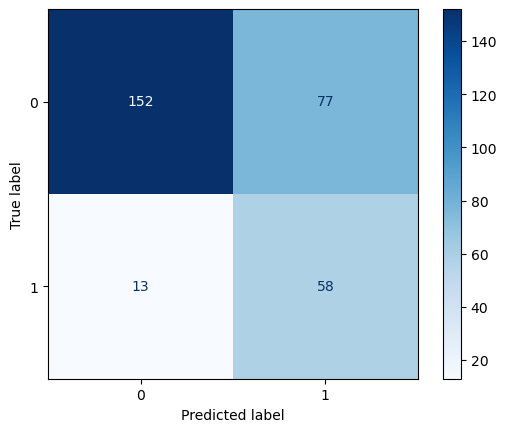

In [103]:
answer=gaussian_model(X_train_u,X_test,y_train_undersampled,y_test)
temp=pd.DataFrame({'Method':['gaussian naive bias without LDA on Undersampling'],'Accuracy': [answer.get('accuracy')],'F1_score':[answer.get('F1-score')],'Recall_0':[answer.get('recall_0')],'Recall_1':[answer.get('recall_1')],'Precision':[answer.get('precision')]})
results = pd.concat([results, temp])
results = results[['Method', 'Accuracy','F1_score','Recall_0','Recall_1','Precision']]
results


### With LDA on undersampling data

Method  Accuracy  F1_score  \
0              Gaussian without LDA on Oversampling  0.673333  0.514851   
0   Logistic regression without LDA on Oversampling  0.750000  0.594595   
0         Random Forest without LDA on Oversampling  0.883333  0.751773   
0              AdaBoost without LDA on Oversampling  0.740000  0.606061   
0               XGBoost without LDA on Oversampling  0.773333  0.638298   
0              XGBoost without LDA on undersampling  0.860000  0.716216   
0             AdaBoost without LDA on Undersampling  0.846667  0.705128   
0        Random Forest without LDA on Undersampling  0.913333  0.800000   
0  Logistic regression without LDA on Undersampling  0.760000  0.621053   
0  gaussian naive bias without LDA on Undersampling  0.700000  0.563107   
0     gaussian naive bias with LDA on Undersampling  0.816667  0.682081   

   Recall_0  Recall_1  Precision  
0  0.655022  0.732394   0.396947  
0  0.742358  0.774648   0.482456  
0  0.925764  0.746479   0.757143  
0  0.707424  0.845070   0.472441  
0  0.751092  0.845070   0.512821  
0  0.895197  0.746479   0.688312  
0  0.868996  0.774648   0.647059  
0  0.969432  0.732394   0.881356  
0  0.737991  0.830986   0.495798  
0  0.663755  0.816901   0.429630  
0  0.812227  0.830986   0.578431

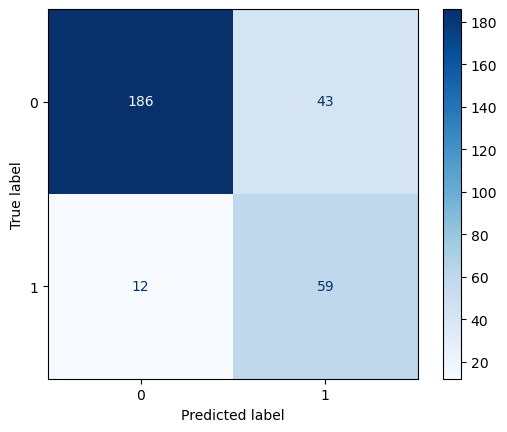

In [104]:
answer=gaussian_model(X_train_lda_u,X_test_lda_u,y_train_undersampled,y_test)
temp=pd.DataFrame({'Method':['gaussian naive bias with LDA on Undersampling'],'Accuracy': [answer.get('accuracy')],'F1_score':[answer.get('F1-score')],'Recall_0':[answer.get('recall_0')],'Recall_1':[answer.get('recall_1')],'Precision':[answer.get('precision')]})
results = pd.concat([results, temp])
results = results[['Method', 'Accuracy','F1_score','Recall_0','Recall_1','Precision']]
results


Method  Accuracy  F1_score  \
0              Gaussian without LDA on Oversampling  0.673333  0.514851   
0   Logistic regression without LDA on Oversampling  0.750000  0.594595   
0         Random Forest without LDA on Oversampling  0.883333  0.751773   
0              AdaBoost without LDA on Oversampling  0.740000  0.606061   
0               XGBoost without LDA on Oversampling  0.773333  0.638298   
0              XGBoost without LDA on undersampling  0.860000  0.716216   
0             AdaBoost without LDA on Undersampling  0.846667  0.705128   
0        Random Forest without LDA on Undersampling  0.913333  0.800000   
0  Logistic regression without LDA on Undersampling  0.760000  0.621053   
0  gaussian naive bias without LDA on Undersampling  0.700000  0.563107   
0     gaussian naive bias with LDA on Undersampling  0.816667  0.682081   
0     Logistic regression with LDA on Undersampling  0.773333  0.634409   

   Recall_0  Recall_1  Precision  
0  0.655022  0.732394   0.396947  
0  0.742358  0.774648   0.482456  
0  0.925764  0.746479   0.757143  
0  0.707424  0.845070   0.472441  
0  0.751092  0.845070   0.512821  
0  0.895197  0.746479   0.688312  
0  0.868996  0.774648   0.647059  
0  0.969432  0.732394   0.881356  
0  0.737991  0.830986   0.495798  
0  0.663755  0.816901   0.429630  
0  0.812227  0.830986   0.578431  
0  0.755459  0.830986   0.513043

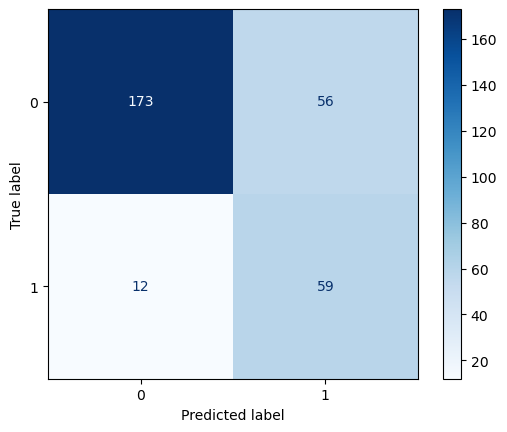

In [105]:
answer=logistic_regression(X_train_lda_u,X_test_lda_u,y_train_undersampled,y_test)
temp=pd.DataFrame({'Method':['Logistic regression with LDA on Undersampling'],'Accuracy': [answer.get('accuracy')],'F1_score':[answer.get('F1-score')],'Recall_0':[answer.get('recall_0')],'Recall_1':[answer.get('recall_1')],'Precision':[answer.get('precision')]})
results = pd.concat([results, temp])
results = results[['Method', 'Accuracy','F1_score','Recall_0','Recall_1','Precision']]
results

Method  Accuracy  F1_score  \
0              Gaussian without LDA on Oversampling  0.673333  0.514851   
0   Logistic regression without LDA on Oversampling  0.750000  0.594595   
0         Random Forest without LDA on Oversampling  0.883333  0.751773   
0              AdaBoost without LDA on Oversampling  0.740000  0.606061   
0               XGBoost without LDA on Oversampling  0.773333  0.638298   
0              XGBoost without LDA on undersampling  0.860000  0.716216   
0             AdaBoost without LDA on Undersampling  0.846667  0.705128   
0        Random Forest without LDA on Undersampling  0.913333  0.800000   
0  Logistic regression without LDA on Undersampling  0.760000  0.621053   
0  gaussian naive bias without LDA on Undersampling  0.700000  0.563107   
0     gaussian naive bias with LDA on Undersampling  0.816667  0.682081   
0     Logistic regression with LDA on Undersampling  0.773333  0.634409   
0           Random Forest with LDA on Undersampling  0.693333  0.535354   

   Recall_0  Recall_1  Precision  
0  0.655022  0.732394   0.396947  
0  0.742358  0.774648   0.482456  
0  0.925764  0.746479   0.757143  
0  0.707424  0.845070   0.472441  
0  0.751092  0.845070   0.512821  
0  0.895197  0.746479   0.688312  
0  0.868996  0.774648   0.647059  
0  0.969432  0.732394   0.881356  
0  0.737991  0.830986   0.495798  
0  0.663755  0.816901   0.429630  
0  0.812227  0.830986   0.578431  
0  0.755459  0.830986   0.513043  
0  0.676856  0.746479   0.417323

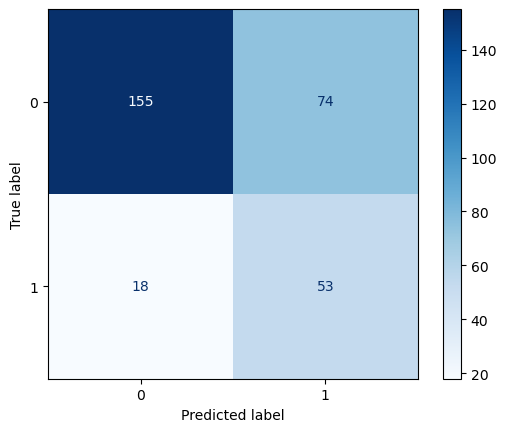

In [106]:
answer=randomforest(X_train_lda_u,X_test_lda_u,y_train_undersampled,y_test)
temp=pd.DataFrame({'Method':['Random Forest with LDA on Undersampling'],'Accuracy': [answer.get('accuracy')],'F1_score':[answer.get('F1-score')],'Recall_0':[answer.get('recall_0')],'Recall_1':[answer.get('recall_1')],'Precision':[answer.get('precision')]})
results = pd.concat([results, temp])
results = results[['Method', 'Accuracy','F1_score','Recall_0','Recall_1','Precision']]
results

Method  Accuracy  F1_score  \
0              Gaussian without LDA on Oversampling  0.673333  0.514851   
0   Logistic regression without LDA on Oversampling  0.750000  0.594595   
0         Random Forest without LDA on Oversampling  0.883333  0.751773   
0              AdaBoost without LDA on Oversampling  0.740000  0.606061   
0               XGBoost without LDA on Oversampling  0.773333  0.638298   
0              XGBoost without LDA on undersampling  0.860000  0.716216   
0             AdaBoost without LDA on Undersampling  0.846667  0.705128   
0        Random Forest without LDA on Undersampling  0.913333  0.800000   
0  Logistic regression without LDA on Undersampling  0.760000  0.621053   
0  gaussian naive bias without LDA on Undersampling  0.700000  0.563107   
0     gaussian naive bias with LDA on Undersampling  0.816667  0.682081   
0     Logistic regression with LDA on Undersampling  0.773333  0.634409   
0           Random Forest with LDA on Undersampling  0.693333  0.535354   
0                AdaBoost with LDA on Undersampling  0.853333  0.698630   

   Recall_0  Recall_1  Precision  
0  0.655022  0.732394   0.396947  
0  0.742358  0.774648   0.482456  
0  0.925764  0.746479   0.757143  
0  0.707424  0.845070   0.472441  
0  0.751092  0.845070   0.512821  
0  0.895197  0.746479   0.688312  
0  0.868996  0.774648   0.647059  
0  0.969432  0.732394   0.881356  
0  0.737991  0.830986   0.495798  
0  0.663755  0.816901   0.429630  
0  0.812227  0.830986   0.578431  
0  0.755459  0.830986   0.513043  
0  0.676856  0.746479   0.417323  
0  0.895197  0.718310   0.680000

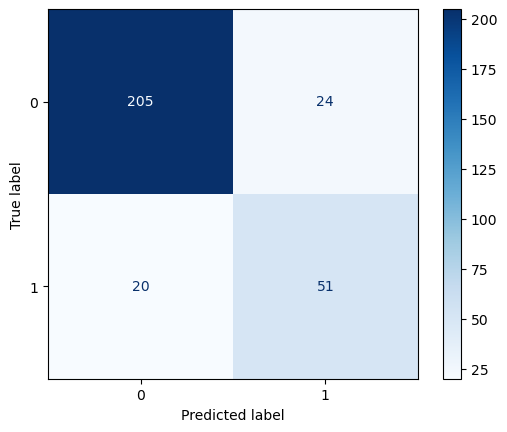

In [107]:
answer=adabooost(X_train_lda_u,X_test_lda_u,y_train_undersampled,y_test)
temp=pd.DataFrame({'Method':['AdaBoost with LDA on Undersampling'],'Accuracy': [answer.get('accuracy')],'F1_score':[answer.get('F1-score')],'Recall_0':[answer.get('recall_0')],'Recall_1':[answer.get('recall_1')],'Precision':[answer.get('precision')]})
results = pd.concat([results, temp])
results = results[['Method', 'Accuracy','F1_score','Recall_0','Recall_1','Precision']]
results

Method  Accuracy  F1_score  \
0              Gaussian without LDA on Oversampling  0.673333  0.514851   
0   Logistic regression without LDA on Oversampling  0.750000  0.594595   
0         Random Forest without LDA on Oversampling  0.883333  0.751773   
0              AdaBoost without LDA on Oversampling  0.740000  0.606061   
0               XGBoost without LDA on Oversampling  0.773333  0.638298   
0              XGBoost without LDA on undersampling  0.860000  0.716216   
0             AdaBoost without LDA on Undersampling  0.846667  0.705128   
0        Random Forest without LDA on Undersampling  0.913333  0.800000   
0  Logistic regression without LDA on Undersampling  0.760000  0.621053   
0  gaussian naive bias without LDA on Undersampling  0.700000  0.563107   
0     gaussian naive bias with LDA on Undersampling  0.816667  0.682081   
0     Logistic regression with LDA on Undersampling  0.773333  0.634409   
0           Random Forest with LDA on Undersampling  0.693333  0.535354   
0                AdaBoost with LDA on Undersampling  0.853333  0.698630   
0                 XGBoost with LDA on undersampling  0.726667  0.563830   

   Recall_0  Recall_1  Precision  
0  0.655022  0.732394   0.396947  
0  0.742358  0.774648   0.482456  
0  0.925764  0.746479   0.757143  
0  0.707424  0.845070   0.472441  
0  0.751092  0.845070   0.512821  
0  0.895197  0.746479   0.688312  
0  0.868996  0.774648   0.647059  
0  0.969432  0.732394   0.881356  
0  0.737991  0.830986   0.495798  
0  0.663755  0.816901   0.429630  
0  0.812227  0.830986   0.578431  
0  0.755459  0.830986   0.513043  
0  0.676856  0.746479   0.417323  
0  0.895197  0.718310   0.680000  
0  0.720524  0.746479   0.452991

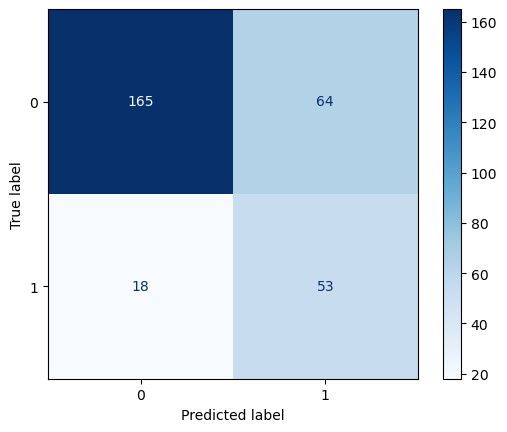

In [108]:
answer=Xgboost(X_train_lda_u,X_test_lda_u,y_train_undersampled,y_test)
temp=pd.DataFrame({'Method':['XGBoost with LDA on undersampling'],'Accuracy': [answer.get('accuracy')],'F1_score':[answer.get('F1-score')],'Recall_0':[answer.get('recall_0')],'Recall_1':[answer.get('recall_1')],'Precision':[answer.get('precision')]})
results = pd.concat([results, temp])
results = results[['Method', 'Accuracy','F1_score','Recall_0','Recall_1','Precision']]
results

### With LDA on oversampling data

Method  Accuracy  F1_score  \
0              Gaussian without LDA on Oversampling  0.673333  0.514851   
0   Logistic regression without LDA on Oversampling  0.750000  0.594595   
0         Random Forest without LDA on Oversampling  0.883333  0.751773   
0              AdaBoost without LDA on Oversampling  0.740000  0.606061   
0               XGBoost without LDA on Oversampling  0.773333  0.638298   
0              XGBoost without LDA on undersampling  0.860000  0.716216   
0             AdaBoost without LDA on Undersampling  0.846667  0.705128   
0        Random Forest without LDA on Undersampling  0.913333  0.800000   
0  Logistic regression without LDA on Undersampling  0.760000  0.621053   
0  gaussian naive bias without LDA on Undersampling  0.700000  0.563107   
0     gaussian naive bias with LDA on Undersampling  0.816667  0.682081   
0     Logistic regression with LDA on Undersampling  0.773333  0.634409   
0           Random Forest with LDA on Undersampling  0.693333  0.535354   
0                AdaBoost with LDA on Undersampling  0.853333  0.698630   
0                 XGBoost with LDA on undersampling  0.726667  0.563830   
0                  XGBoost with LDA on Oversampling  0.766667  0.623656   

   Recall_0  Recall_1  Precision  
0  0.655022  0.732394   0.396947  
0  0.742358  0.774648   0.482456  
0  0.925764  0.746479   0.757143  
0  0.707424  0.845070   0.472441  
0  0.751092  0.845070   0.512821  
0  0.895197  0.746479   0.688312  
0  0.868996  0.774648   0.647059  
0  0.969432  0.732394   0.881356  
0  0.737991  0.830986   0.495798  
0  0.663755  0.816901   0.429630  
0  0.812227  0.830986   0.578431  
0  0.755459  0.830986   0.513043  
0  0.676856  0.746479   0.417323  
0  0.895197  0.718310   0.680000  
0  0.720524  0.746479   0.452991  
0  0.751092  0.816901   0.504348

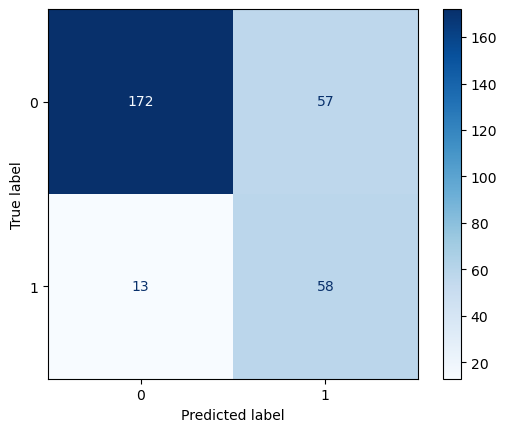

In [109]:
answer=Xgboost(X_train_lda_0,X_test_lda_0,y_train_oversampled,y_test)
temp=pd.DataFrame({'Method':['XGBoost with LDA on Oversampling'],'Accuracy': [answer.get('accuracy')],'F1_score':[answer.get('F1-score')],'Recall_0':[answer.get('recall_0')],'Recall_1':[answer.get('recall_1')],'Precision':[answer.get('precision')]})
results = pd.concat([results, temp])
results = results[['Method', 'Accuracy','F1_score','Recall_0','Recall_1','Precision']]
results

Method  Accuracy  F1_score  \
0              Gaussian without LDA on Oversampling  0.673333  0.514851   
0   Logistic regression without LDA on Oversampling  0.750000  0.594595   
0         Random Forest without LDA on Oversampling  0.883333  0.751773   
0              AdaBoost without LDA on Oversampling  0.740000  0.606061   
0               XGBoost without LDA on Oversampling  0.773333  0.638298   
0              XGBoost without LDA on undersampling  0.860000  0.716216   
0             AdaBoost without LDA on Undersampling  0.846667  0.705128   
0        Random Forest without LDA on Undersampling  0.913333  0.800000   
0  Logistic regression without LDA on Undersampling  0.760000  0.621053   
0  gaussian naive bias without LDA on Undersampling  0.700000  0.563107   
0     gaussian naive bias with LDA on Undersampling  0.816667  0.682081   
0     Logistic regression with LDA on Undersampling  0.773333  0.634409   
0           Random Forest with LDA on Undersampling  0.693333  0.535354   
0                AdaBoost with LDA on Undersampling  0.853333  0.698630   
0                 XGBoost with LDA on undersampling  0.726667  0.563830   
0                  XGBoost with LDA on Oversampling  0.766667  0.623656   
0                 AdaBoost with LDA on Oversampling  0.840000  0.671233   

   Recall_0  Recall_1  Precision  
0  0.655022  0.732394   0.396947  
0  0.742358  0.774648   0.482456  
0  0.925764  0.746479   0.757143  
0  0.707424  0.845070   0.472441  
0  0.751092  0.845070   0.512821  
0  0.895197  0.746479   0.688312  
0  0.868996  0.774648   0.647059  
0  0.969432  0.732394   0.881356  
0  0.737991  0.830986   0.495798  
0  0.663755  0.816901   0.429630  
0  0.812227  0.830986   0.578431  
0  0.755459  0.830986   0.513043  
0  0.676856  0.746479   0.417323  
0  0.895197  0.718310   0.680000  
0  0.720524  0.746479   0.452991  
0  0.751092  0.816901   0.504348  
0  0.886463  0.690141   0.653333

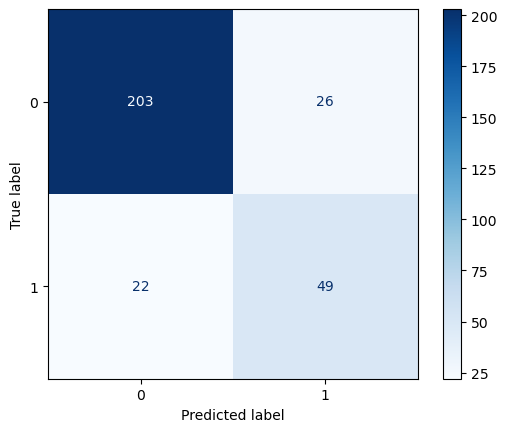

In [110]:
answer=adabooost(X_train_lda_0,X_test_lda_0,y_train_oversampled,y_test)
temp=pd.DataFrame({'Method':['AdaBoost with LDA on Oversampling'],'Accuracy': [answer.get('accuracy')],'F1_score':[answer.get('F1-score')],'Recall_0':[answer.get('recall_0')],'Recall_1':[answer.get('recall_1')],'Precision':[answer.get('precision')]})
results = pd.concat([results, temp])
results = results[['Method', 'Accuracy','F1_score','Recall_0','Recall_1','Precision']]
results

Method  Accuracy  F1_score  \
0              Gaussian without LDA on Oversampling  0.673333  0.514851   
0   Logistic regression without LDA on Oversampling  0.750000  0.594595   
0         Random Forest without LDA on Oversampling  0.883333  0.751773   
0              AdaBoost without LDA on Oversampling  0.740000  0.606061   
0               XGBoost without LDA on Oversampling  0.773333  0.638298   
0              XGBoost without LDA on undersampling  0.860000  0.716216   
0             AdaBoost without LDA on Undersampling  0.846667  0.705128   
0        Random Forest without LDA on Undersampling  0.913333  0.800000   
0  Logistic regression without LDA on Undersampling  0.760000  0.621053   
0  gaussian naive bias without LDA on Undersampling  0.700000  0.563107   
0     gaussian naive bias with LDA on Undersampling  0.816667  0.682081   
0     Logistic regression with LDA on Undersampling  0.773333  0.634409   
0           Random Forest with LDA on Undersampling  0.693333  0.535354   
0                AdaBoost with LDA on Undersampling  0.853333  0.698630   
0                 XGBoost with LDA on undersampling  0.726667  0.563830   
0                  XGBoost with LDA on Oversampling  0.766667  0.623656   
0                 AdaBoost with LDA on Oversampling  0.840000  0.671233   
0            Random Forest with LDA on Oversampling  0.706667  0.560000   

   Recall_0  Recall_1  Precision  
0  0.655022  0.732394   0.396947  
0  0.742358  0.774648   0.482456  
0  0.925764  0.746479   0.757143  
0  0.707424  0.845070   0.472441  
0  0.751092  0.845070   0.512821  
0  0.895197  0.746479   0.688312  
0  0.868996  0.774648   0.647059  
0  0.969432  0.732394   0.881356  
0  0.737991  0.830986   0.495798  
0  0.663755  0.816901   0.429630  
0  0.812227  0.830986   0.578431  
0  0.755459  0.830986   0.513043  
0  0.676856  0.746479   0.417323  
0  0.895197  0.718310   0.680000  
0  0.720524  0.746479   0.452991  
0  0.751092  0.816901   0.504348  
0  0.886463  0.690141   0.653333  
0  0.681223  0.788732   0.434109

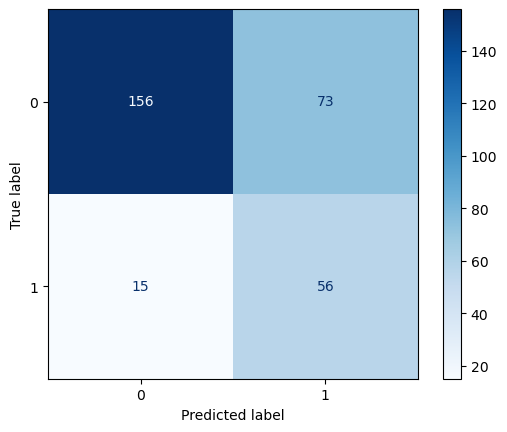

In [111]:
answer=randomforest(X_train_lda_0,X_test_lda_0,y_train_oversampled,y_test)
temp=pd.DataFrame({'Method':['Random Forest with LDA on Oversampling'],'Accuracy': [answer.get('accuracy')],'F1_score':[answer.get('F1-score')],'Recall_0':[answer.get('recall_0')],'Recall_1':[answer.get('recall_1')],'Precision':[answer.get('precision')]})
results = pd.concat([results, temp])
results = results[['Method', 'Accuracy','F1_score','Recall_0','Recall_1','Precision']]
results

Method  Accuracy  F1_score  \
0              Gaussian without LDA on Oversampling  0.673333  0.514851   
0   Logistic regression without LDA on Oversampling  0.750000  0.594595   
0         Random Forest without LDA on Oversampling  0.883333  0.751773   
0              AdaBoost without LDA on Oversampling  0.740000  0.606061   
0               XGBoost without LDA on Oversampling  0.773333  0.638298   
0              XGBoost without LDA on undersampling  0.860000  0.716216   
0             AdaBoost without LDA on Undersampling  0.846667  0.705128   
0        Random Forest without LDA on Undersampling  0.913333  0.800000   
0  Logistic regression without LDA on Undersampling  0.760000  0.621053   
0  gaussian naive bias without LDA on Undersampling  0.700000  0.563107   
0     gaussian naive bias with LDA on Undersampling  0.816667  0.682081   
0     Logistic regression with LDA on Undersampling  0.773333  0.634409   
0           Random Forest with LDA on Undersampling  0.693333  0.535354   
0                AdaBoost with LDA on Undersampling  0.853333  0.698630   
0                 XGBoost with LDA on undersampling  0.726667  0.563830   
0                  XGBoost with LDA on Oversampling  0.766667  0.623656   
0                 AdaBoost with LDA on Oversampling  0.840000  0.671233   
0            Random Forest with LDA on Oversampling  0.706667  0.560000   
0      Logistic regression with LDA on Oversampling  0.760000  0.608696   

   Recall_0  Recall_1  Precision  
0  0.655022  0.732394   0.396947  
0  0.742358  0.774648   0.482456  
0  0.925764  0.746479   0.757143  
0  0.707424  0.845070   0.472441  
0  0.751092  0.845070   0.512821  
0  0.895197  0.746479   0.688312  
0  0.868996  0.774648   0.647059  
0  0.969432  0.732394   0.881356  
0  0.737991  0.830986   0.495798  
0  0.663755  0.816901   0.429630  
0  0.812227  0.830986   0.578431  
0  0.755459  0.830986   0.513043  
0  0.676856  0.746479   0.417323  
0  0.895197  0.718310   0.680000  
0  0.720524  0.746479   0.452991  
0  0.751092  0.816901   0.504348  
0  0.886463  0.690141   0.653333  
0  0.681223  0.788732   0.434109  
0  0.751092  0.788732   0.495575

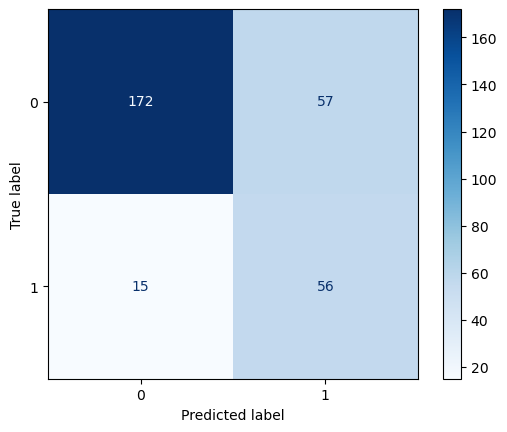

In [112]:
answer=logistic_regression(X_train_lda_0,X_test_lda_0,y_train_oversampled,y_test)
temp=pd.DataFrame({'Method':['Logistic regression with LDA on Oversampling'],'Accuracy': [answer.get('accuracy')],'F1_score':[answer.get('F1-score')],'Recall_0':[answer.get('recall_0')],'Recall_1':[answer.get('recall_1')],'Precision':[answer.get('precision')]})
results = pd.concat([results, temp])
results = results[['Method', 'Accuracy','F1_score','Recall_0','Recall_1','Precision']]
results

Method  Accuracy  F1_score  \
0              Gaussian without LDA on Oversampling  0.673333  0.514851   
0   Logistic regression without LDA on Oversampling  0.750000  0.594595   
0         Random Forest without LDA on Oversampling  0.883333  0.751773   
0              AdaBoost without LDA on Oversampling  0.740000  0.606061   
0               XGBoost without LDA on Oversampling  0.773333  0.638298   
0              XGBoost without LDA on undersampling  0.860000  0.716216   
0             AdaBoost without LDA on Undersampling  0.846667  0.705128   
0        Random Forest without LDA on Undersampling  0.913333  0.800000   
0  Logistic regression without LDA on Undersampling  0.760000  0.621053   
0  gaussian naive bias without LDA on Undersampling  0.700000  0.563107   
0     gaussian naive bias with LDA on Undersampling  0.816667  0.682081   
0     Logistic regression with LDA on Undersampling  0.773333  0.634409   
0           Random Forest with LDA on Undersampling  0.693333  0.535354   
0                AdaBoost with LDA on Undersampling  0.853333  0.698630   
0                 XGBoost with LDA on undersampling  0.726667  0.563830   
0                  XGBoost with LDA on Oversampling  0.766667  0.623656   
0                 AdaBoost with LDA on Oversampling  0.840000  0.671233   
0            Random Forest with LDA on Oversampling  0.706667  0.560000   
0      Logistic regression with LDA on Oversampling  0.760000  0.608696   
0      gaussian naive bias with LDA on Oversampling  0.763333  0.612022   

   Recall_0  Recall_1  Precision  
0  0.655022  0.732394   0.396947  
0  0.742358  0.774648   0.482456  
0  0.925764  0.746479   0.757143  
0  0.707424  0.845070   0.472441  
0  0.751092  0.845070   0.512821  
0  0.895197  0.746479   0.688312  
0  0.868996  0.774648   0.647059  
0  0.969432  0.732394   0.881356  
0  0.737991  0.830986   0.495798  
0  0.663755  0.816901   0.429630  
0  0.812227  0.830986   0.578431  
0  0.755459  0.830986   0.513043  
0  0.676856  0.746479   0.417323  
0  0.895197  0.718310   0.680000  
0  0.720524  0.746479   0.452991  
0  0.751092  0.816901   0.504348  
0  0.886463  0.690141   0.653333  
0  0.681223  0.788732   0.434109  
0  0.751092  0.788732   0.495575  
0  0.755459  0.788732   0.500000

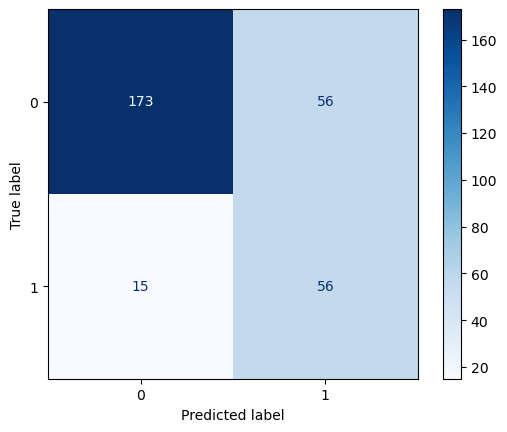

In [113]:
answer=gaussian_model(X_train_lda_0,X_test_lda_0,y_train_oversampled,y_test)
temp=pd.DataFrame({'Method':['gaussian naive bias with LDA on Oversampling'],'Accuracy': [answer.get('accuracy')],'F1_score':[answer.get('F1-score')],'Recall_0':[answer.get('recall_0')],'Recall_1':[answer.get('recall_1')],'Precision':[answer.get('precision')]})
results = pd.concat([results, temp])
results = results[['Method', 'Accuracy','F1_score','Recall_0','Recall_1','Precision']]
results


### Best algorithm: Random Forest without LDA on Undersampling
#### Selected feature set: 

['ownership', 'activation_plan_code', 'mnp_flag',
       'calls_outgoing_cnt', 'tot_usage_mb', 'cnt_open_qrc',
       'avg_days_to_close', 'cnt_call_drops', 'pcnt_dropped_calls',
       'rsrp_data_pcnt_poor_duration', 'mean_cqi_voice_pcnt_poor_duration',
       'sinr_data_pcnt_poor_duration', 'cnt_connections', 'current_plan_code',
       'pcnt_quota_used', 'recharge_delay']

### Evaluation result of Random Forest without LDA on Undersampling: 
#### Accuracy    F1-score.   Recall_0.   Recall_1.   Precision
0.913333	0.800000	0.969432	0.732394	0.881356

